In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import pandas as pd
# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit

# models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor


#pipelines
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

In [9]:


# requests_9292 = pd.read_csv("PNB_Verzoeken.csv")

# #requests_9292_mini = requests_9292.sample(frac=0.1)
# ### 9292 REQUESTS COLUMNS ### (LOG OF ALL REQUESTS MADE ON THE 9292 APP IN NOVEMBER 2019)
# # QUESTION_TULP_ID : Unique Identifier
# # Opvraag datum : Request Date
# # Gewenste reis datum : Desired Travel Date
# # Opvraag tijd uur : Query time Hours
# # Gewenste vertrek tijd uur : Desried Departure Time Hours
# # Halteclusternummer begin reis : Stop Cluster Number Start Journey
# # Halteclusternummer eind reis : Stop Cluster Number End Journey
# # Haltenaam begin reis : Stop Name Begin Journey
# # Haltenaam eind reis : Stop Name End Journey


# advices_9292 = pd.read_csv("PNB_Adviezen.csv")

# bus_9292 = advices_9292[advices_9292['Modaliteit']=='Bus']

# #advices_9292_mini = advices_9292.sample(frac=0.1)
# ### 9292 ADVICES COLUMNS ### (LOG OF ALL ADVICES GENERATED ON EACH OF THE PREVIOUS REQUESTS)
# # QUESTION_TULP_ID : Unique Request Identifier
# # Lag nummer : Lay number
# # Lijn : Line
# # Modaliteitsnummer : Modality Number
# # Haltenummer van rit : Stop Number of Trip
# # Haltenummer naar rit : Stop Number to Trip
# # Reistijd lag : Travel Time 
# # Startdatum lag : Start Date
# # Starttijd lag : Start Time
# # Haltenaam van rit : Stop Name of trip - Origin
# # Haltenaam naar rit : Stop Name to trip - Destination
# # Modaliteit : Modality
# # Modaliteit Detail : Modality Detail



# arriva_passenger_data = pd.read_csv("Bus_OD_data_WestOostBrabant_2019_11.csv",sep=';')
# #arriva_passenger_data_mini = arriva_passenger_data.sample(frac=0.1)
# ### ARRIVA PASSENGER DATA COLUMNS ### (ACTUAL BUS CHECK-IN NUMBERS FOR ALL BUSES THROUGH NOVEMBER 2019)
# # Exploitatiedatum : Operating Date
# # Concessie : Concession
# # Lijnnummer : Line Number
# # Station Herkomst : Origin Station
# # Station : Current Station
# # Totaal : Total Occupancy


# arriva_line_information = pd.read_csv("lijnnummer_koppeling.csv",sep=';')

# ### BUS LINE INFORMATION COLUMNS ### (EXTRA INFORMATION ON EACH BUS LINE NUMBER)
# # Concessie : Concession
# # InternLijnnummer : Internal Line Number (Used by arriva)
# # PublieksLijnnummer : Public Line Number (Visible to the public and on 9292 app)
# # Omschrijving : Description
# # Type : Bus Line Type


# arriva_haltes = pd.read_csv("Arriva_Haltes.csv",sep=';')

# ### BUS STOP LOCATIONS ### (EXTRA INFORMATION ON EACH BUS STOP)

In [10]:
##del arriva_passenger_data['Exploitatiedatum']
#arriva_passenger_data.insert(loc=1,column='Day',value=pd.Series(pd.DatetimeIndex(arriva_passenger_data['Exploitatiedatum'])).dt.day_name())

#arriva_passenger_data.index.dt.day_name 
#arriva_passenger_data.insert(loc=1,column='Day_num',value=pd.Series(pd.DatetimeIndex(arriva_passenger_data['Exploitatiedatum'])).dt.dayofweek)
#arriva_passenger_data['Date'] = ['0'+arriva_passenger_data['Exploitatiedatum'][index] if len(arriva_passenger_data['Exploitatiedatum'][index])<10 else arriva_passenger_data['Exploitatiedatum'][index] for index in arriva_passenger_data.index]
# arriva_passenger_data.insert(loc=2,column='Source Station',value=pd.Series([arriva_haltes[arriva_haltes['Arriva_FARESTOPSHORTDESCRIPTION']==elem][['CHB_Haltenaam']].values for elem in arriva_passenger_data['Station Herkomst']]))
# arriva_passenger_data.insert(loc=3,column='Destination Station',value=pd.Series([arriva_haltes[arriva_haltes['Arriva_FARESTOPSHORTDESCRIPTION']==elem][['CHB_Haltenaam']].values for elem in arriva_passenger_data['Station']]))

# arriva_cleaned = arriva_passenger_data[['Day','Lijnnummer','Exploitatiedatum','Source Station','Destination Station','Totaal']]
# arriva_cleaned['Source Station']=[str(elem) for elem in arriva_cleaned['Source Station']]
# arriva_cleaned['Source Station']=[elem[3:-3] for elem in arriva_cleaned['Source Station']]
# arriva_cleaned['Destination Station']=[str(elem) for elem in arriva_cleaned['Destination Station']]
# arriva_cleaned['Destination Station']=[elem[3:-3] for elem in arriva_cleaned['Destination Station']]
# arriva_cleaned.replace("",np.nan,inplace=True)
# arriva_cleaned = arriva_cleaned.dropna()

# arriva_cleaned.to_pickle('arriva_cleaned_final')

# cleaned_9292 = pd.read_csv('C:\\Users\\Sumeet Zankar\\Downloads\\DEIA-1\\9292_updated.csv')
# cleaned_9292.insert(loc=1,column='Day',value=pd.Series(pd.DatetimeIndex(cleaned_9292['Startdatum_lag'])).dt.day_name())



In [146]:

line_names = ['4','2','3','5','7','8','9',"1 Tolberg West-Station-Kortendijk","2 Langdonk-Station-Tolberg Oost","3 Kortendijk-Station-Kroeven","4 Station-WVS-Station","833"]
line_stops = [
    ['Breda, Hovenierstraat',
                'Breda, Dreef',
                'Breda, Nieuwe Heilaarstraat',
                'Breda, Woonboulevard',
                'Breda, Liesboslaan',
                'Breda, Ambachtenlaan',
                'Breda, Doelen',
                'Breda, Hovenierstraat',
                'Breda, Burgemeester Sutoriusstraat',
                'Breda, Flierstraat',
                'Breda, Mgr.Nolensplein',
                'Breda, Heuvelbrink',
                'Breda, Dr. Struyckenplein',
                'Breda, Bontekoestraat',
                'Breda, Amphia Zkh. Langendijk',
                'Breda, Langendijk',
                'Breda, Graaf Hendrik III Laan',
                'Breda, Grote Spie',
                'Breda, Irenestraat',
                'Breda, Markendaalseweg',
                'Breda, Centrum',
                'Breda, Vlaszak',
                'Breda, Centraal Station',
                'Breda, Belcrumweg',
                'Breda, Konijnenberg',
                'Breda, Spinveld',
                'Breda, Donk',
                'Breda, Heienlangdonk',
                'Breda, Somerweide',
                'Breda, Noortberghmoeren',
                'Breda, Cannaertserf',
                'Breda, Komoord',
                'Breda, Dwarsdijk',
                'Breda, Emerparklaan',
                'Breda, Heksenwiellaan']
    
    ,

["Goirle, Baronielaan",
"Breda, Groenedijkplein",
"Breda, Cornelis Florisstraat",
"Breda, Tilman Suysstraat",
"Breda, Waterdonken",
"Breda, Hendrik Berlagestraat",
"Breda, Lieven de Keystraat",
"Breda, Lelystraat",
"Breda, Verviersstraat",
"Breda, Doornboslaan",
"Breda, Centraal Station",
"Breda, Vlaszak",
"Breda, Centrum",
"Breda, Fellenoordstraat",
"Breda, Nieuwe Haagdijk",
"Breda, Schorsmolenstraat",
"Breda, Dijkplein",
"Breda, Lunetstraat",
"Breda, Stadion NAC",
"Breda, Peerdsbroek",
"Breda, Bremtuin",
"Breda, Wandelakker",
"Breda, Elzenbroek",
"Breda, Wilgenbroek",
"Breda, Westerhagelaan NS",
"Breda, Laaghamlaan",
"Breda, Alexberg",
"Breda, Muizenberglaan",
"Breda, Paradijslaan",
"Breda, Regenwulp",
"Breda, Overkroetenlaan",
"Breda, Lange Slagen",
"Breda, Zeggeveen",
"Breda, Heksenwiellaan"]

,

["Breda, Centraal Station",
"Breda, Nieuwe Prinsenkade",
"Breda, Tolbrug",
"Breda, Centrum",
"Breda, Vlaszak",
"Breda, Centraal Station",
"Breda, Sophiastraat",
"Breda, Nassausingel", 
"Breda, St.Ignatiusstraat",
"Breda, Brabantplein",
"Breda, Mgr. Leijtenstraat",
"Breda, Lage Kant",
"Breda, Langveld",
"Breda, Wilderen",
"Breda, Draaiboom",
"Breda, Sterrebos",
"Breda, Heerbaan"]
,
["‘s-Hertogenbosch, Centraal Station",
"Breda, Centraal Station",
"Breda, Vlaszak",
"Breda, Centrum",
"Breda, Markendaalseweg",
"Breda, Irenestraat",
"Breda, Graaf Hendrik III Laan",
"Breda, Grote Spie",
"Breda, Verdilaan",
"Breda, Willem van Oranjelaan",
"Breda, Duivelsbruglaan",
"Breda, Bouvigne",
"Breda, Galderseweg",
"Breda, De Blauwe Kamer",
"Breda, De Klokkenberg",
"Galder, Galderse Meren",
"Galder, Smidshof",
"Galder, Ballemanseweg",
"Galder, Markweg",
"Meersel Dreef, Nieuw Dreef"]
,
["Breda, Nieuw Wolfslaarlaan",
"Breda, Muiderslotstraat",
"Breda, Walenburgstraat",
"Breda, Zwijnsbergenstraat",
"Breda, Mariaplein",
"Breda, Marialaan",
"Breda, Valkeniersplein",
"Breda, Van Duijvenvoordestraat",
"Breda, Prins Hendrikstraat",
"Breda, Ginnekenweg",
"Breda, Wilhelminastraat",
"Breda, Nwe Ginnekenstraat",
"Breda, Centrum",
"Breda, Vlaszak",
"Breda, Centraal Station",
"Breda, Sophiastraat",
"Breda, Nassausingel", 
"Breda, St.Ignatiusstraat",
"Breda, Brabantplein"
"Breda, Mgr. de Vetstraat",
"Breda, Epelenberg",
"Breda, Giraffestraat",
"Breda, Tilburgseweg",
"Breda, Bergschot",
"Breda, Heerbaan"
]
,
["Breda, Centraal Station",
"Breda, Sophiastraat",
"Breda, Nassausingel",
"Breda, St.Ignatiusstraat"]
,

["Breda, Centraal Station",
"Breda, Vlaszak",
"Breda, Claudius Prinsenlaan",
"Breda, Lovensdijkstraat",
"Breda, Hogeschoollaan",
"Breda, Amphia Zkh. Molengracht",
"Breda, Bijster",
"Breda, Loevesteinstraat"]
,

[
"Roosendaal, Damastberg",
"Roosendaal, Fazantberg",
"Roosendaal, Jasmijnberg",
"Roosendaal, Thorbeckelaan",
"Roosendaal, Lelieberg",
"Roosendaal, Heulberg",
"Roosendaal, Tolberg Centrum",
"Roosendaal, Willem Dreesweg",
"Roosendaal, Heerma van Vossstraat",
"Roosendaal, Morelberg",
"Roosendaal, Bravis Ziekenhuis",
"Roosendaal, Boerhaavelaan",
"Roosendaal, Burg. Freijterslaan",
"Roosendaal, Roselaar",
"Roosendaal, Station",
"Roosendaal, Brugstraat",
"Roosendaal, Van Beethovenlaan",
"Roosendaal, Prof. Aalbersestraat",
"Roosendaal, Strausslaan",
"Roosendaal, Takspui",
"Roosendaal, Basaltdijk",
"Roosendaal, Bergkristaldijk",
"Roosendaal, Diamantdijk",
"Roosendaal, Dolomietdijk",
"Roosendaal, Koraaldijk",
"Roosendaal, Lavadijk",
"Roosendaal, Flintdijk",
"Roosendaal, Onyxdijk",
"Roosendaal, Sterrebos"]
,
[
"Roosendaal, Odiliadonk",
"Roosendaal, Jurriaandonk",
"Roosendaal, Martinusdonk",
"Roosendaal, Stephanusdonk",
"Roosendaal, Bovendonk",
"Roosendaal, A-Dijk",
"Roosendaal, Basaltdijk",
"Roosendaal, Takspui",
"Roosendaal, Strausslaan",
"Roosendaal, Prof. Aalbersestraat",
"Roosendaal, Van Beethovenlaan",
"Roosendaal, Brugstraat",
"Roosendaal, Station",
"Roosendaal, Roselaar",
"Roosendaal, Bergrand",
"Roosendaal, Champetterberg",
"Roosendaal, Chaletberg",
"Roosendaal, Bandeliersberg",
"Roosendaal, Ambrozijnberg",
"Roosendaal, Amberberg",
"Roosendaal, Damastberg"]
,
[
"Roosendaal, Sterrebos",
"Roosendaal, ‘t Zand",
"Roosendaal, Elisadonk",
"Roosendaal, Lindenburg",
"Roosendaal, Burg. Schneiderlaan",
"Roosendaal, Boulevard",
"Roosendaal, Brugstraat",
"Roosendaal, Station",
"Roosendaal, Roselaar",
"Roosendaal, Kroevenlaan",
"Roosendaal, Staringlaan",
"Roosendaal, Beetslaan",
"Roosendaal, President Kennedylaan",
"Roosendaal, Benedendonk",
"Roosendaal, Odiliadonk"]
,
[
"Roosendaal, Station",
"Roosendaal, Waterstraat",
"Roosendaal, Spoorstraat",
"Roosendaal, WVS Bosstraat",
"Roosendaal, WVS Vaartveld",
"Roosendaal, Spoorstraat",
"Roosendaal, Waterstraat",
"Roosendaal, Station"]
,
[
"Roosendaal, Station",
"Roosendaal, Roselaar",
"Roosendaal, Kroevenlaan",
"Roosendaal, Staringlaan",
"Roosendaal, Beetslaan",
"Roosendaal, President Kennedylaan",
"Roosendaal, Benedendonk"]

]


line_stop_dict = {line_name:line_stop for (line_name,line_stop) in zip(line_names,line_stops)} 

for key in line_stop_dict.keys():
    line_stop_dict[key] = {stop:num for (num,stop) in enumerate(line_stop_dict[key])}


In [178]:
import itertools
#line_stop_dict
# [elem for elem in itertools.permutations(line_stop_dict['8'].items(),2) if elem[0][1] > elem[1][1]]

[(('Breda, Sophiastraat', 1), ('Breda, Centraal Station', 0)),
 (('Breda, Nassausingel', 2), ('Breda, Centraal Station', 0)),
 (('Breda, Nassausingel', 2), ('Breda, Sophiastraat', 1)),
 (('Breda, St.Ignatiusstraat', 3), ('Breda, Centraal Station', 0)),
 (('Breda, St.Ignatiusstraat', 3), ('Breda, Sophiastraat', 1)),
 (('Breda, St.Ignatiusstraat', 3), ('Breda, Nassausingel', 2))]

dict_keys(['4', '2', '3', '5', '7', '8', '9', '1 Tolberg West-Station-Kortendijk', '2 Langdonk-Station-Tolberg Oost', '3 Kortendijk-Station-Kroeven', '4 Station-WVS-Station', '833'])

In [30]:
cleaned_9292 = pd.read_pickle('final_9292')
arriva_cleaned = pd.read_picle('final_arriva')

In [50]:
# select line 4
line_df_arriva = arriva_cleaned

# Make source and dest lower case
line_df_arriva['Source Station'] = [elem.lower() for elem in arriva_line_4_df['Source Station']]
arriva_line_4_df['Destination Station'] = [elem.lower() for elem in arriva_line_4_df['Destination Station']]

# Add source and dest number columns
arriva_line_4_df['Source Station Number'] = [line_4_dict.get(loc) for loc in arriva_line_4_df[(arriva_line_4_df['Lijnnummer'] == 4)]['Source Station']]
arriva_line_4_df['Destination Station Number'] = [line_4_dict.get(loc) for loc in arriva_line_4_df[(arriva_line_4_df['Lijnnummer'] == 4)]['Destination Station']]

arriva_line_4_df.dropna(inplace=True)

In [ ]:
occupancy_df_arriva = pd.DataFrame(columns = ['Exploitatiedatum','Station','Occupancy'])


In [43]:
# For buses going in one direction
original_direction = arriva_line_4_df[arriva_line_4_df['Source Station Number'] < arriva_line_4_df['Destination Station Number']]

# For buses going in opposite direction
reverse_direction = arriva_line_4_df[arriva_line_4_df['Source Station Number'] > arriva_line_4_df['Destination Station Number']]


og_arriva_occupancy_line_4_df = pd.DataFrame(columns = ['Exploitatiedatum','Station','Occupancy'])
rev_arriva_occupancy_line_4_df = pd.DataFrame(columns = ['Exploitatiedatum','Station','Occupancy'])


for date in arriva_line_4_df['Exploitatiedatum'].unique():
    for stop in sorted(arriva_line_4_df['Source Station Number'].unique()):
        occupancy = original_direction[(original_direction['Exploitatiedatum'] == date)&(original_direction['Source Station Number'] <= stop)]['Totaal'].sum() - original_direction[(original_direction['Exploitatiedatum'] == date)&  (original_direction['Destination Station Number'] < stop)]['Totaal'].sum()
        og_arriva_occupancy_line_4_df = og_arriva_occupancy_line_4_df.append({'Exploitatiedatum':date, 'Station':stop, 'Occupancy':occupancy},ignore_index=True)

        #print([date, stop, occupancy])

for date in arriva_line_4_df['Exploitatiedatum'].unique():
    for stop in sorted(arriva_line_4_df['Source Station Number'].unique()):
        occupancy = reverse_direction[(reverse_direction['Exploitatiedatum'] == date)&(reverse_direction['Source Station Number'] <= stop)]['Totaal'].sum() - reverse_direction[(reverse_direction['Exploitatiedatum'] == date)&  (reverse_direction['Destination Station Number'] < stop)]['Totaal'].sum()
        rev_arriva_occupancy_line_4_df = rev_arriva_occupancy_line_4_df.append({'Exploitatiedatum':date, 'Station':stop, 'Occupancy':occupancy},ignore_index=True)
        #print([date, stop, occupancy])

In [179]:
cleaned_9292

Unnamed: 0        Day Startdatum_lag  Starttijd_lag  Lijn  \
0                0    Tuesday     2019-10-29              5   401   
1                1    Tuesday     2019-10-29              6    10   
2                2    Tuesday     2019-10-29              6   176   
3                3    Tuesday     2019-10-29              6   327   
4                4    Tuesday     2019-10-29              6     8   
...            ...        ...            ...            ...   ...   
343402      343402    Tuesday     2019-12-31             23   370   
343403      343403    Tuesday     2019-12-31             23   388   
343404      343404    Tuesday     2019-12-31             23   401   
343405      343405    Tuesday     2019-12-31             23   813   
343406      343406  Wednesday     2020-01-01              0   388   

        Modaliteitsnummer                      Haltenaam_van_rit  \
0                       2                        Breda, station    
1                     176             Dordrecht, Gerechtsgebouw    
2                       2          Dordrecht, Centraal Station     
3                     167                Amsterdam, Brinkstraat    
4                     176          Dordrecht, Centraal Station     
...                   ...                                    ...   
343402                 64               Weert, Station Perron E    
343403                178                   Sliedrecht, Station    
343404                  2         Utrecht, Graadt van Roggenweg    
343405                  2  Rotterdam, Centraal Station halte HH    
343406                178          Sliedrecht, Station Baanhoek    

                    Haltenaam_naar_rit  QUESTION_TULP_ID  
0         Utrecht, CS Jaarbeursplein                   1  
1        Dordrecht, Centraal Station                   2  
2               's-Gravendeel, Weegje                  1  
3            Amsterdam, Amstelstation                  2  
4          Dordrecht, Wieldrechtseweg                  1  
...                                ...               ...  
343402        Venlo, Station Perron A                  1  
343403    Utrecht, CS Jaarbeurszijde                   1  
343404                 Breda, station                  4  
343405  Amsterdam, Station Sloterdijk                  1  
343406    Utrecht, CS Jaarbeurszijde                   1  

[343407 rows x 9 columns]

In [55]:
# For buses going in both directions
line_occupancy_df_9292 = pd.DataFrame(columns = ['Line','Day','Date','Direction','Station','Occupancy'])

for date in cleaned_9292['Startdatum_lag'].unique():


for line in line_stop_dict.keys():
            
        stops_direction_pair = [(elem[0],elem[1],'original')if elem[0][1] < elem[1][1] else (elem[0],elem[1],'reverse') if elem[0][1] > elem[1][1] for elem in itertools.permutations(line_stop_dict[line].items(),2) ]

        temp_df = cleaned_9292[(cleaned_9292['Haltenaam_van_rit']==stops_direction_pair[0]) &(cleaned_9292['Haltenaam_naar_rit']==stops_direction_pair[1])]
        
        for date in temp_df['Startdatum_lag'].unique():
            for day in temp_df['Day'].unique():
                for stop in line_stop_dict[line].keys():

                    occupancy = temp_df[(temp_df['Startdatum_lag'] == date)&(temp_df['Haltenaam_van_rit_number'] <= stop)]['QUESTION_TULP_ID'].sum() - temp_df[(temp_df['Startdatum_lag'] == date) & (temp_df['Haltenaam_naar_rit_number'] < stop)]['QUESTION_TULP_ID'].sum()
                    
                    temp_df.append({'Line':line,'Day':,day,'Date':date,'Direction':stops_direction_pair[2],'Station':})


        





original_direction = app_line_4_df[app_line_4_df['Haltenaam_van_rit_number'] < app_line_4_df['Haltenaam_naar_rit_number']]

# For buses going in opposite direction
reverse_direction = app_line_4_df[app_line_4_df['Haltenaam_van_rit_number'] > app_line_4_df['Haltenaam_naar_rit_number']]

og_app_occupancy_line_4_df = pd.DataFrame(columns = ['Day','Date','Station','Occupancy','Direction'])
rev_app_occupancy_line_4_df = pd.DataFrame(columns = ['Day','Date','Station','Occupancy','Direction'])

for date in app_line_4_df['Startdatum_lag'].unique(): 
    for stop in sorted(line_4_dict.values()):
        for day in app_line_4_df['Day'].unique():
        #sorted(app_line_4_df['Haltenaam_van_rit_number'].unique()):
            occupancy = original_direction[(original_direction['Startdatum_lag'] == date)&(original_direction['Haltenaam_van_rit_number'] <= stop)]['QUESTION_TULP_ID'].sum() - original_direction[(original_direction['Startdatum_lag'] == date) & (original_direction['Haltenaam_naar_rit_number'] < stop)]['QUESTION_TULP_ID'].sum()
            og_app_occupancy_line_4_df = og_app_occupancy_line_4_df.append({'Day':day,'Exploitatiedatum':date, 'Station':stop, 'Occupancy':occupancy},ignore_index=True)
            #print([date, stop, occupancy])

for date in arriva_line_4_df['Exploitatiedatum'].unique():
    for stop in sorted(line_4_dict.values()):
        for day in app_line_4_df['Day'].unique():
            occupancy = reverse_direction[(reverse_direction['Startdatum_lag'] == date)&(reverse_direction['Haltenaam_van_rit_number'] <= stop)]['QUESTION_TULP_ID'].sum() - reverse_direction[(reverse_direction['Startdatum_lag'] == date)&  (reverse_direction['Haltenaam_naar_rit_number'] < stop)]['QUESTION_TULP_ID'].sum()
            rev_app_occupancy_line_4_df = rev_app_occupancy_line_4_df.append({'Day':day,'Exploitatiedatum':date, 'Station':stop, 'Occupancy':occupancy},ignore_index=True)
            #print([date, stop, occupancy])

In [56]:
og_app_occupancy_line_4_df['Exploitatiedatum']=["-".join(og_app_occupancy_line_4_df['Exploitatiedatum'][index].split('-')[::-1]) for index in og_app_occupancy_line_4_df.index]
rev_app_occupancy_line_4_df['Exploitatiedatum']=["-".join(rev_app_occupancy_line_4_df['Exploitatiedatum'][index].split('-')[::-1]) for index in rev_app_occupancy_line_4_df.index]

In [22]:
def get_x_y(direction = 'forward'):
    x = list()
    y = list()

    if direction == 'forward':
        for date in og_arriva_occupancy_line_4_df['Exploitatiedatum'].unique():
            for stop in og_arriva_occupancy_line_4_df['Station'].unique():
                y.append(list(og_arriva_occupancy_line_4_df[(og_arriva_occupancy_line_4_df['Exploitatiedatum']==date) & (og_arriva_occupancy_line_4_df['Station']==stop)]['Occupancy'].values))
                x.append(list(og_app_occupancy_line_4_df[(og_app_occupancy_line_4_df['Exploitatiedatum']==date) & (og_app_occupancy_line_4_df['Station']==stop)]['Occupancy'].values))

        zipped_xy_values = [(elem[0],elem[1]) for elem in zip(x,y) if len(elem[0]) > 0 and len(elem[1]) > 0]

        x = np.array([elem[0][0] for elem in zipped_xy_values])
        y = np.array([elem[1][0] for elem in zipped_xy_values])

    if direction == 'reverse':
        for date in rev_arriva_occupancy_line_4_df['Exploitatiedatum'].unique():
            for stop in rev_arriva_occupancy_line_4_df['Station'].unique():
                y.append(list(rev_arriva_occupancy_line_4_df[(rev_arriva_occupancy_line_4_df['Exploitatiedatum']==date) & (rev_arriva_occupancy_line_4_df['Station']==stop)]['Occupancy'].values))
                x.append(list(rev_app_occupancy_line_4_df[(rev_app_occupancy_line_4_df['Exploitatiedatum']==date) & (rev_app_occupancy_line_4_df['Station']==stop)]['Occupancy'].values))

        zipped_xy_values = [(elem[0],elem[1]) for elem in zip(x,y) if len(elem[0]) > 0 and len(elem[1]) > 0]

        x = np.array([elem[0][0] for elem in zipped_xy_values])
        y = np.array([elem[1][0] for elem in zipped_xy_values])
        

    return x,y

In [171]:

# Per Station
# Agg:Sum by week


Station
1       518
2       735
3      4984
4      4557
5      4732
6      4823
7      5495
8      5775
9      7651
10     8043
11    10003
12    10836
13    14462
14    15624
15    18858
16    20363
17    20349
18    21630
19    24199
20    32795
21    35777
22    52899
23    17269
24    16373
25    15477
26    11249
27     8134
28     6307
29     5565
30     4627
31     4074
32     3717
33     3010
34     1449
Name: Occupancy, dtype: int64

In [25]:
og_arriva_occupancy_line_4_df

NameError: name 'og_arriva_occupancy_line_4_df' is not defined

In [137]:
def regression_plot(x,y,xlabel='X',ylabel='Y',logy=False,params=None):
    if params == None:
        params = {
            'hidden_layer_sizes': (100,),
            'activation': 'identity',
            # 'mlp__solver':'adam',
            '':0.0001,
            'learning_rate':'constant',
            'learning_rate_init':0.1,
            # 'mlp__power_t':0.5,  assert(solver='sgd' and learning_rate='inv_scaling)        
            # 'mlp__max_iter':200,
            'tol':0.0001,
            # 'mlp__verbose':False,
            # 'mlp__warm_start':False,
            # 'mlp__momentum':0.9,
            # 'mlp__nesterovs_momentum':True,
            # 'mlp__early_stopping':False,
            # 'mlp__validation_fraction':0.05,
            'epsilon':1e-08,
            'beta_1': 0.9,
            'beta_2':0.999,
            'epsilon':1e-8       
        }
    fig, ax = plt.subplots()    
    ax.plot(x,y, linewidth=0, marker='v', label='Data points')
        
    #model_rbf_svr = SVR(kernel='rbf', C=1, gamma=0.001, epsilon=.1).fit(x.reshape(-1,1),y)

    #ax.plot(x, model_rbf_svr.predict(x.reshape(-1,1)),label='RBF SVR')

    max_x = np.max(x)

    model_mlp = MLPRegressor(hidden_layer_sizes=(1000,500), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant',                   learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,                       nesterovs_momentum=True, early_stopping=False, validation_fraction=0.05, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000).fit(x.reshape(-1,1),y)

    ax.plot(range(int(max_x)), model_mlp.predict(np.array(range(int(max_x))).reshape(-1,1)) ,label='Multi Layer Perceptron')


    model_linear = LinearRegression().fit(x.reshape(-1,1),y)

    ax.plot(range(int(max_x)), model_linear.predict(np.array(range(int(max_x))).reshape(-1,1)) ,label='Linear Regressor')


    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if logy:
        ax.set_yscale('log')
    ax.legend(facecolor='white')

In [138]:
x,y = get_x_y()
regression_plot(x,y,'9292 Request Count','Arriva Bus Occupancy',logy=True)

NameError: name 'get_x_y' is not defined

In [7]:
sbm = pd.read_csv('C:\\Users\\Sumeet Zankar\\Downloads\\SBM 2020\\dis_socre_df.csv')

In [8]:
sbm

Unnamed: 0        Organization Name     score  Number of Employees  \
0              0                 Variantz  1.362122                    0   
1              1                      IRI  1.321807                    6   
2              2                 Protenus  1.243662                    2   
3              5           IMNA Solutions  1.272164                    1   
4              7                   Atheer  1.346859                    1   
...          ...                      ...       ...                  ...   
4843           0  Convergint Technologies  1.376124                    7   
4844           5           Orions Systems  1.374835                    0   
4845           6                   revoPT  1.349146                    0   
4846           7              Kaia Health  1.368782                    2   
4847           8         Magentiq Eye Ltd  1.328835                    0   

      Total Funding Amount Currency (in USD)  hub_location  Funding Status  
0                                    10521.0             3               0  
1                                181040000.0             3               2  
2                                 36200000.0             1               3  
3                                  1600000.0             0               0  
4                                 35328066.0             0               3  
...                                      ...           ...             ...  
4843                              66704898.0             0               2  
4844                                249990.0             0               0  
4845                                 12000.0             0               0  
4846                              22000000.0             4               1  
4847                               1454868.0             0               0  

[4848 rows x 7 columns]

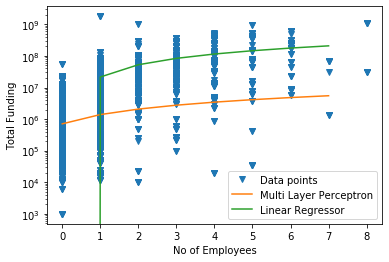

In [322]:
y = [elem for elem in sbm['Total Funding Amount Currency (in USD)']]
x = np.array([elem for elem in sbm['Number of Employees']])
regression_plot(x,y,'No of Employees','Total Funding',logy=True)

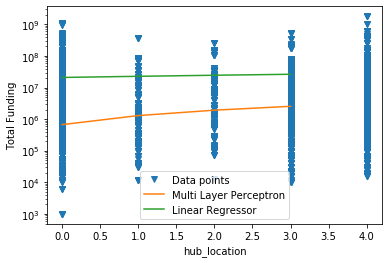

In [323]:
y = [elem for elem in sbm['Total Funding Amount Currency (in USD)']]
x = np.array([elem for elem in sbm['hub_location']])
regression_plot(x,y,'hub_location','Total Funding',logy=True)

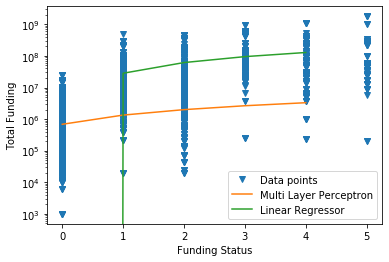

In [324]:
y = [elem for elem in sbm['Total Funding Amount Currency (in USD)']]
x = np.array([elem for elem in sbm['Funding Status']])
regression_plot(x,y,'Funding Status','Total Funding',logy=True)

Text(0.5, 0, 'Log Total Funding')

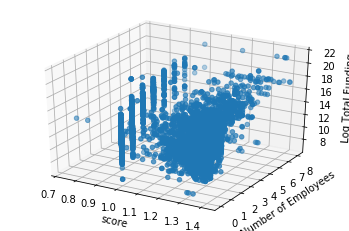

In [348]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter( np.array([elem for elem in sbm['score']]),np.array([elem for elem in sbm['Number of Employees']]), np.log1p([elem for elem in sbm['Total Funding Amount Currency (in USD)']]))
ax.set_xlabel('score')
ax.set_ylabel('Number of Employees')
ax.set_zlabel('Log Total Funding')

In [11]:
# Import dependencies
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(
    x= np.array([elem for elem in sbm['score']]).tolist(),  # <-- Put your data instead
    y=np.array([elem for elem in sbm['Number of Employees']]).tolist(),  # <-- Put your data instead
    z=np.log1p([elem for elem in sbm['Total Funding Amount Currency (in USD)']]).tolist(),  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 10,
        'opacity': 0.8,
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

In [356]:
plot3D( np.array([elem for elem in sbm['score']]).tolist(),np.array([elem for elem in sbm['Number of Employees']]).tolist(), np.log1p([elem for elem in sbm['Total Funding Amount Currency (in USD)']]).tolist(),xlabel='score',ylabel='Number of Employees',zlabel='Log Total Funding')

In [3]:
import numpy as np

In [122]:
cleaned_9292.to_pickle('final_9292')

In [132]:
# og_arriva_occupancy_line_4_df


# for one request of 9292:
#     (Day,Date,Hour,Source,Destination)
#     For the intended trip

# for the requested day:
#         calculate the ratio of req/total req for the requested hour (this data will only have samples from the same day)
#         model.predict()*calculated ratio for the requested hour
        

#day,date,hour,source,destination
def get_hourly_occupancy_prediction(day,date,hour,source,destination):
    if source == destination:
        return 0

    Source_num = line_4_dict[source]
    Dest_num = line_4_dict[destination]

    if Source_num < Dest_num:
        df = og_app_occupancy_line_4_df
    else:
        df = rev_app_occupancy_line_4_df

    res_df = df[(df['Station']>=Source_num)&(df['Exploitatiedatum']==date)&(df['Station']<Dest_num)&(df['Day']==day)]

    return np.mean(model_linear.predict(np.array([res_df['Occupancy'][index] for index in res_df.index]).reshape(-1,1)))    * cleaned_9292[(cleaned_9292['Lijn']==4)&(cleaned_9292['Day']==day)&(cleaned_9292['Modaliteitsnummer']==2)&(cleaned_9292['Starttijd_lag']==hour)].groupby('Startdatum_lag').sum()['QUESTION_TULP_ID'].mean()/cleaned_9292[(cleaned_9292['Lijn']==4)&(cleaned_9292['Day']==day)&(cleaned_9292['Modaliteitsnummer']==2)].groupby('Startdatum_lag').sum()['QUESTION_TULP_ID'].mean()


def get_hub_locations(day,hour,source,destination):

# urbanization less than 70
# municipality density cut off 250
# no of stops less than 5 

# then sort by max passengers in that municipality 

# then sort by least no of stops 

# Returns a list of 10 (town,municipality,priority_score) tuples

    


In [38]:
towns = [elem.lower().split(', ')[0] for elem in cleaned_9292['Haltenaam_van_rit']]

In [24]:
selection.sort_values(by=['no of stops '])

towns  municipality  municipality population  \
0             achtmaal       zundert                    21829   
95            wernhout       zundert                    21829   
89                veen        altena                    10203   
57      nieuwvossemeer   steenbergen                    24416   
17           drongelen        altena                    10203   
52             meeuwen        altena                    10203   
28             giessen        altena                    10203   
47            langeweg      moerdijk                    37129   
20              eethen        altena                    10203   
11              deheen   steenbergen                    24416   
5      babylonienbroek        altena                    10203   
98          woudrichem        altena                    10203   
55         nieuwendijk        altena                    10203   
59           noordhoek      moerdijk                    37129   
82     standaardbuiten      moerdijk                    37129   
97          willemstad      moerdijk                    37129   
25              galder  alphen-chaam                    10203   
33                hank        altena                    10203   
35          heijningen      moerdijk                    37129   
13          dinteloord   steenbergen                    24416   
72          rijsbergen       zundert                    21829   
87            ulicoten  baarlenassau                     6859   
27            genderen        altena                    10203   
103  zevenbergschehoek      moerdijk                    37129   

     municipality density  urbanization  no of stops   
0                   180.9          56.5             1  
95                  180.9          56.5             1  
89                  109.7          41.1             1  
57                  166.7          68.7             1  
17                  109.7          41.1             1  
52                  109.7          41.1             2  
28                  109.7          41.1             2  
47                  233.3          62.5             2  
20                  109.7          41.1             2  
11                  166.7          68.7             2  
5                   109.7          41.1             2  
98                  109.7          41.1             3  
55                  109.7          41.1             3  
59                  233.3          62.5             3  
82                  233.3          62.5             3  
97                  233.3          62.5             3  
25                  109.7           0.0             4  
33                  109.7          41.1             4  
35                  233.3          62.5             4  
13                  166.7          68.7             4  
72                  180.9          56.5             4  
87                   90.8          50.4             4  
27                  109.7          41.1             4  
103                 233.3          62.5             4

In [142]:
line_4_dict

{'breda, hovenierstraat': 7,
 'breda, dreef': 1,
 'breda, nieuwe heilaarstraat': 2,
 'breda, woonboulevard': 3,
 'breda, liesboslaan': 4,
 'breda, ambachtenlaan': 5,
 'breda, doelen': 6,
 'breda, burgemeester sutoriusstraat': 8,
 'breda, flierstraat': 9,
 'breda, mgr.nolensplein': 10,
 'breda, heuvelbrink': 11,
 'breda, dr. struyckenplein': 12,
 'breda, bontekoestraat': 13,
 'breda, amphia zkh. langendijk': 14,
 'breda, langendijk': 15,
 'breda, graaf hendrik iii laan': 16,
 'breda, grote spie': 17,
 'breda, irenestraat': 18,
 'breda, markendaalseweg': 19,
 'breda, centrum': 20,
 'breda, vlaszak': 21,
 'breda, centraal station': 22,
 'breda, belcrumweg': 23,
 'breda, konijnenberg': 24,
 'breda, spinveld': 25,
 'breda, donk': 26,
 'breda, heienlangdonk': 27,
 'breda, somerweide': 28,
 'breda, noortberghmoeren': 29,
 'breda, cannaertserf': 30,
 'breda, komoord': 31,
 'breda, dwarsdijk': 32,
 'breda, emerparklaan': 33,
 'breda, heksenwiellaan': 34}

In [13]:
urb_scores.columns

Index(['towns', 'municipality', 'municipality population',
       'municipality density', 'urbanization', 'no of stops '],
      dtype='object')

In [100]:
#& (urb_scores['municipality density']<250)
selection

towns  municipality  municipality population  \
0             achtmaal       zundert                    21829   
5      babylonienbroek        altena                    10203   
11              deheen   steenbergen                    24416   
13          dinteloord   steenbergen                    24416   
16           drimmelen     drimmelen                    27272   
17           drongelen        altena                    10203   
20              eethen        altena                    10203   
25              galder  alphen-chaam                    10203   
27            genderen        altena                    10203   
28             giessen        altena                    10203   
33                hank        altena                    10203   
35          heijningen      moerdijk                    37129   
41        hoogezwaluwe     drimmelen                    27272   
47            langeweg      moerdijk                    37129   
52             meeuwen        altena                    10203   
55         nieuwendijk        altena                    10203   
57      nieuwvossemeer   steenbergen                    24416   
59           noordhoek      moerdijk                    37129   
72          rijsbergen       zundert                    21829   
82     standaardbuiten      moerdijk                    37129   
87            ulicoten  baarlenassau                     6859   
89                veen        altena                    10203   
92           wagenberg     drimmelen                    27272   
95            wernhout       zundert                    21829   
97          willemstad      moerdijk                    37129   
98          woudrichem        altena                    10203   
103  zevenbergschehoek      moerdijk                    37129   

     municipality density  urbanization  no of stops   
0                   180.9          56.5             1  
5                   109.7          41.1             2  
11                  166.7          68.7             2  
13                  166.7          68.7             4  
16                  286.5          65.0             1  
17                  109.7          41.1             1  
20                  109.7          41.1             2  
25                  109.7           0.0             4  
27                  109.7          41.1             4  
28                  109.7          41.1             2  
33                  109.7          41.1             4  
35                  233.3          62.5             4  
41                  286.5          65.0             4  
47                  233.3          62.5             2  
52                  109.7          41.1             2  
55                  109.7          41.1             3  
57                  166.7          68.7             1  
59                  233.3          62.5             3  
72                  180.9          56.5             4  
82                  233.3          62.5             3  
87                   90.8          50.4             4  
89                  109.7          41.1             1  
92                  286.5          65.0             1  
95                  180.9          56.5             1  
97                  233.3          62.5             3  
98                  109.7          41.1             3  
103                 233.3          62.5             4

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [113]:
#selection = selection.sort_values(by=['total'],ascending=False)
#selection = selection.sort_values(by=['no of stops',ascending=True])
# selection['pass/nb_stops'] = [ selection['total'][index]/selection['no of stops '][index]  for index in selection.index]
# selection.sort_values(by=['pass/nb_stops'],ascending=False)


urb_scores = pd.read_excel('towns and villages data .xlsx')

selection = urb_scores[ (urb_scores['urbanization']<70) & (urb_scores['no of stops '] < 5) ]


sel = arriva_processed.groupby(['origin town']).sum().reset_index()
sel_df = sel[['origin town','Totaal']]

# Create Passengers Column
selection['passengers'] = [sel_df[sel_df['origin town']==elem]['Totaal'].values[0] for elem in selection['towns']]

# Create Priority Score
selection['priority_score'] = [float(elem[1]/elem[0]) for elem in zip(MinMaxScaler(feature_range=(1,10)).fit_transform(selection['no of stops '].values.reshape(-1,1)),MinMaxScaler(feature_range=(1,10)).fit_transform(selection['passengers'].values.reshape(-1,1)))]


selection['origin town lat'] = [arriva_processed[arriva_processed['origin town']==elem]['origin town lat'].values[0] for elem in selection['towns']]
selection['origin town lon'] = [arriva_processed[arriva_processed['origin town']==elem]['origin town lon'].values[0] for elem in selection['towns']]

# Df containing final list of possible hub locations
final_hubs = selection.sort_values(by=['priority_score'],ascending=False)

# sel = sel[['origin town','Totaal','origin town lat','origin town lon']]




In [135]:
final_hubs

towns  municipality  municipality population  \
92           wagenberg     drimmelen                    27272   
89                veen        altena                    10203   
0             achtmaal       zundert                    21829   
95            wernhout       zundert                    21829   
57      nieuwvossemeer   steenbergen                    24416   
16           drimmelen     drimmelen                    27272   
13          dinteloord   steenbergen                    24416   
17           drongelen        altena                    10203   
55         nieuwendijk        altena                    10203   
72          rijsbergen       zundert                    21829   
33                hank        altena                    10203   
47            langeweg      moerdijk                    37129   
97          willemstad      moerdijk                    37129   
28             giessen        altena                    10203   
98          woudrichem        altena                    10203   
20              eethen        altena                    10203   
52             meeuwen        altena                    10203   
5      babylonienbroek        altena                    10203   
11              deheen   steenbergen                    24416   
87            ulicoten  baarlenassau                     6859   
103  zevenbergschehoek      moerdijk                    37129   
41        hoogezwaluwe     drimmelen                    27272   
82     standaardbuiten      moerdijk                    37129   
25              galder  alphen-chaam                    10203   
59           noordhoek      moerdijk                    37129   
27            genderen        altena                    10203   
35          heijningen      moerdijk                    37129   

     municipality density  urbanization  no of stops   passengers  \
92                  286.5          65.0             1        4349   
89                  109.7          41.1             1        1367   
0                   180.9          56.5             1         633   
95                  180.9          56.5             1         321   
57                  166.7          68.7             1         301   
16                  286.5          65.0             1          49   
13                  166.7          68.7             4        8742   
17                  109.7          41.1             1          24   
55                  109.7          41.1             3        5547   
72                  180.9          56.5             4        7581   
33                  109.7          41.1             4        5813   
47                  233.3          62.5             2        1630   
97                  233.3          62.5             3        3315   
28                  109.7          41.1             2        1383   
98                  109.7          41.1             3        2004   
20                  109.7          41.1             2         275   
52                  109.7          41.1             2         216   
5                   109.7          41.1             2         106   
11                  166.7          68.7             2          42   
87                   90.8          50.4             4        1139   
103                 233.3          62.5             4        1017   
41                  286.5          65.0             4         933   
82                  233.3          62.5             3         357   
25                  109.7           0.0             4         805   
59                  233.3          62.5             3         272   
27                  109.7          41.1             4         244   
35                  233.3          62.5             4         208   

     priority_score origin town lat origin town lon  
92         5.464900      51.669.586         475.247  
89         2.386442      51.776.818       5.102.449  
0          1.628699      51.453.817       4.584.497  
95         1.306607      51.456.053       4.645

In [120]:
df_arriva = final_hubs[['towns','origin town lat','origin town lon']]
all_stations = list(df_arriva['towns'])

In [126]:
list(df_arriva[df_arriva['towns']=='wagenberg' ]['origin town lat'])[0]

'51.669.586'

In [130]:
stations_with_lat_long= []
for station in all_stations :
    stations_with_lat_long.append((station, 
                                   list(df_arriva[df_arriva['towns']==station ]['origin town lat'])[0],
                                   list(df_arriva[df_arriva['towns']== station]['origin town lon'])[0] )) 

fixed_stations_with_lat_long= [list(i) for i in stations_with_lat_long]

for index, station in enumerate(fixed_stations_with_lat_long):   
    #for lat
    temp = station[1].replace('.','')
    fixed_stations_with_lat_long[index][1]= float(temp[:2]+'.'+temp[2:])
    #for lon
    temp = station[2].replace('.','')
    fixed_stations_with_lat_long[index][2]= float(temp[:1]+'.'+temp[1:])

In [134]:
pd.DataFrame(fixed_stations_with_lat_long).to_csv('for_ahmad_with_love')

In [110]:
arriva_processed[['origin town','origin town lat','origin town lon','score']]


origin town origin town lat origin town lon  Totaal
0           geffen      51.725.928       5.467.171       3
1           geffen      51.725.928       5.467.171       7
2           geffen      51.725.928       5.467.171       2
3           geffen      51.725.928       5.467.171       1
4           geffen      51.727.089       5.465.841       1
...            ...             ...             ...     ...
528808       breda      51.595.875       4.779.003       1
528809       breda      51.595.875       4.779.003       1
528810       breda      51.595.875       4.779.003       6
528811       breda      51.595.875       4.779.003       2
528812       breda      51.595.875       4.779.003       1

[528813 rows x 4 columns]

In [47]:
sel = arriva_processed.groupby(['origin town']).sum().reset_index()
# sel[(sel['origin town'] == 'zundert') | ()]
#sel['origin town'] in ['aalburg','werkendam','woudrichem','zundert','steenbergen','moerdijk','baarlenassau']
#sel = sel[sel['origin town'].isin(['aalburg','werkendam','woudrichem','zundert','steenbergen','moerdijk','baarlenassau'])]

In [56]:
sel_df

origin town  Totaal
0             achtmaal     633
1              almkerk     806
2               alphen    3780
3                andel    7164
4         baarlenassau    9196
..                 ...     ...
209              zegge     354
210        zevenbergen   22100
211  zevenbergschehoek    1017
212            zundert   14914
213        zwartenberg      32

[214 rows x 2 columns]

In [62]:
#selection
#selection['total']=


towns  municipality  municipality population  \
0             achtmaal       zundert                    21829   
5      babylonienbroek        altena                    10203   
11              deheen   steenbergen                    24416   
13          dinteloord   steenbergen                    24416   
17           drongelen        altena                    10203   
20              eethen        altena                    10203   
25              galder  alphen-chaam                    10203   
27            genderen        altena                    10203   
28             giessen        altena                    10203   
33                hank        altena                    10203   
35          heijningen      moerdijk                    37129   
47            langeweg      moerdijk                    37129   
52             meeuwen        altena                    10203   
55         nieuwendijk        altena                    10203   
57      nieuwvossemeer   steenbergen                    24416   
59           noordhoek      moerdijk                    37129   
72          rijsbergen       zundert                    21829   
82     standaardbuiten      moerdijk                    37129   
87            ulicoten  baarlenassau                     6859   
89                veen        altena                    10203   
95            wernhout       zundert                    21829   
97          willemstad      moerdijk                    37129   
98          woudrichem        altena                    10203   
103  zevenbergschehoek      moerdijk                    37129   

     municipality density  urbanization  no of stops   total  
0                   180.9          56.5             1    633  
5                   109.7          41.1             2    106  
11                  166.7          68.7             2     42  
13                  166.7          68.7             4   8742  
17                  109.7          41.1             1     24  
20                  109.7          41.1             2    275  
25                  109.7           0.0             4    805  
27                  109.7          41.1             4    244  
28                  109.7          41.1             2   1383  
33                  109.7          41.1             4   5813  
35                  233.3          62.5             4    208  
47                  233.3          62.5             2   1630  
52                  109.7          41.1             2    216  
55                  109.7          41.1             3   5547  
57                  166.7          68.7             1    301  
59                  233.3          62.5             3    272  
72                  180.9          56.5             4   7581  
82                  233.3          62.5             3    357  
87                   90.8          50.4             4   1139  
89                  109.7          41.1             1   1367  
95                  180.9          56.5             1    321  
97                  233.3          62.5             3   3315  
98                  109.7          41.1             3   2004  
103                 233.3          62.5             4   1017

In [282]:
sel['origin town']=[elem.replace('werkendam','altena').replace('woudrichem','altena').replace('aalburg','altena') for elem in sel['origin town']]

In [284]:
sel.groupby('origin town').sum()

Unnamed: 0  Lijnnummer  Totaal
origin town                                 
altena         457100567      527268    5310
baarlenassau   544643167      304688    9196
moerdijk        95951058      121138     500
steenbergen    834513472      633665   17024
zundert        669875899      493643   14914

In [272]:
selection

towns  municipality  municipality population  \
0             achtmaal       zundert                    21829   
5      babylonienbroek        altena                    10203   
11              deheen   steenbergen                    24416   
13          dinteloord   steenbergen                    24416   
17           drongelen        altena                    10203   
20              eethen        altena                    10203   
25              galder  alphen-chaam                    10203   
27            genderen        altena                    10203   
28             giessen        altena                    10203   
33                hank        altena                    10203   
35          heijningen      moerdijk                    37129   
47            langeweg      moerdijk                    37129   
52             meeuwen        altena                    10203   
55         nieuwendijk        altena                    10203   
57      nieuwvossemeer   steenbergen                    24416   
59           noordhoek      moerdijk                    37129   
72          rijsbergen       zundert                    21829   
82     standaardbuiten      moerdijk                    37129   
87            ulicoten  baarlenassau                     6859   
89                veen        altena                    10203   
95            wernhout       zundert                    21829   
97          willemstad      moerdijk                    37129   
98          woudrichem        altena                    10203   
103  zevenbergschehoek      moerdijk                    37129   

     municipality density  urbanization  no of stops   
0                   180.9          56.5             1  
5                   109.7          41.1             2  
11                  166.7          68.7             2  
13                  166.7          68.7             4  
17                  109.7          41.1             1  
20                  109.7          41.1             2  
25                  109.7           0.0             4  
27                  109.7          41.1             4  
28                  109.7          41.1             2  
33                  109.7          41.1             4  
35                  233.3          62.5             4  
47                  233.3          62.5             2  
52                  109.7          41.1             2  
55                  109.7          41.1             3  
57                  166.7          68.7             1  
59                  233.3          62.5             3  
72                  180.9          56.5             4  
82                  233.3          62.5             3  
87                   90.8          50.4             4  
89                  109.7          41.1             1  
95                  180.9          56.5             1  
97                  233.3          62.5             3  
98                  109.7          41.1             3  
103                 233.3          62.5             4

In [243]:
stop_occupancy["'s Gravenmoer, Hoofdstraat "]
#stop_occupancy.index[0]

541

In [219]:
selection['municipa

array(['zundert', 'altena', 'steenbergen', 'alphen-chaam', 'moerdijk',
       'baarlenassau'], dtype=object)

In [225]:
['aalburg','werkendam','woudrichem','zundert','steenbergen','moerdijk','baarle-nassau']

['aalburg',
 'werkendam',
 'woudrichem',
 'zundert',
 'steenbergen',
 'moerdijk',
 'baarle-nassau']

In [248]:
#['zundert' in 
df = pd.DataFrame([elem.lower() for elem in stop_occupancy.index.values])
lst=list()
[stop[elem] for elem in list([df[df[0].str.contains(elem+',')]] for elem in ['aalburg','werkendam','woudrichem','zundert','steenbergen','moerdijk','baarle-nassau']:

#elem.contains('zundert') for elem in 

<generator object <genexpr> at 0x000002632B30ED68>
<generator object <genexpr> at 0x000002632B30ED68>
<generator object <genexpr> at 0x000002632B30ED68>
<generator object <genexpr> at 0x000002632B30ED68>
<generator object <genexpr> at 0x000002632B30ED68>
<generator object <genexpr> at 0x000002632B30ED68>
<generator object <genexpr> at 0x000002632B30ED68>


In [198]:
og_app_occupancy_line_4_df.groupby('Station').sum()['Occupancy']


Station
1       518
2       735
3      4984
4      4557
5      4732
6      4823
7      5495
8      5775
9      7651
10     8043
11    10003
12    10836
13    14462
14    15624
15    18858
16    20363
17    20349
18    21630
19    24199
20    32795
21    35777
22    52899
23    17269
24    16373
25    15477
26    11249
27     8134
28     6307
29     5565
30     4627
31     4074
32     3717
33     3010
34     1449
Name: Occupancy, dtype: int64

In [138]:
og_arriva_occupancy_line_4_df

Exploitatiedatum  Station Occupancy
0          1-11-2019      1.0         1
1          1-11-2019      2.0         5
2          1-11-2019      4.0        39
3          1-11-2019      5.0        62
4          1-11-2019      6.0        75
..               ...      ...       ...
955       30-11-2019     30.0       113
956       30-11-2019     31.0        98
957       30-11-2019     32.0        93
958       30-11-2019     33.0        68
959       30-11-2019     34.0        26

[960 rows x 3 columns]

In [140]:
og_app_occupancy_line_4_df

Day Exploitatiedatum Station Occupancy
0        Friday       01-11-2019       1         2
1      Saturday       01-11-2019       1         2
2        Sunday       01-11-2019       1         2
3        Monday       01-11-2019       1         2
4       Tuesday       01-11-2019       1         2
...         ...              ...     ...       ...
7135     Sunday       30-11-2019      34        14
7136     Monday       30-11-2019      34        14
7137    Tuesday       30-11-2019      34        14
7138  Wednesday       30-11-2019      34        14
7139   Thursday       30-11-2019      34        14

[7140 rows x 4 columns]

In [135]:
get_occupancy_prediction('Monday',0,'breda, nieuwe heilaarstraat','breda, komoord')

3.7563678068145054

In [458]:
#returns regressor pipeline
def regressor_pipeline(estimator,categorical_features=None,numerical_features =None):
    
    # Creating a pipeline with one-hot-encoder for categorical data 
    categoric_transformer = make_pipeline(OneHotEncoder(sparse=False,handle_unknown='ignore'))

    # Creating a pipeline with mean imputer for numerical data 
    numeric_transformer =  make_pipeline(StandardScaler())  
    
    # Combining both pipelines such that each pipeline works on the columns it was meant for
    preprocessor = make_column_transformer((categoric_transformer,categorical_features),
                                           (numeric_transformer,numerical_features)
     )

    # Return the complete pipeline containing preprocessing-piepline and the estimator/classifier
    return Pipeline(steps = [('prep',StandardScaler()),('est',estimator)])


def regression_scores(models):
    keys = list()

    if 'linear_regressor' in models:
        keys.append('linear_regressor')
    if 'mlp_regressor' in models:
        keys.append('mlp_regressor')
    if 'svm_regressor' in models:
        keys.append('svm_regressor')
    if 'rf_regressor' in models:
        keys.append('rf_regressor')

    
    all_models = {'linear_regressor':  LinearRegression().fit(x.reshape(-1,1),y),
                    'mlp_regressor':MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant',                   learning_rate_init=0.1, power_t=0.5, max_iter=200, shuffle=True, random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,                       nesterovs_momentum=True, early_stopping=False, validation_fraction=0.05, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000).fit(x.reshape(-1,1),y),
                    'rf_regressor': RandomForestRegressor(n_estimators=500,random_state=1).fit(x.reshape(-1,1), y)
                    #   'linear_regressor': LinearRegression(n_jobs=-1).fit(partitions[s][x].values, [partitions[s]['Total Funding Amount Currency (in USD)'][element] for element in partitions[s].index] )
                    }
    models = { key: all_models[key] for key in keys }
          
    results = dict() 
    # { 'linear_regressor':[],
    #                     'mlp_regressor' : []
    #                         #'svm_regressor':[],
    #                     # 'linear_regressor':[]  
    #                 
    # }

    

    for (model_name,model_pipe) in models.items():
        for metric in ['r2']: 
            results[model_name]=np.mean(cross_validate(model_pipe,x.reshape(-1,1), y, scoring=metric,cv=ShuffleSplit(n_splits=10,random_state=1),                                           return_train_score=False)['test_score'])

    res = pd.DataFrame(data=results,index=pd.Series([0]))
    res['metrics'] = pd.Series(['r2'])

    return res

In [448]:
regression_scores(['mlp_regressor','rf_regressor','linear_regressor'])

linear_regressor  mlp_regressor  rf_regressor metrics
0          0.668013        0.58447       0.66355      r2

In [459]:
regressor_pipeline(MLPRegressor())

Pipeline(steps=[('prep', StandardScaler()), ('est', MLPRegressor())])

In [460]:
regressor_pipeline(RandomForestRegressor())

Pipeline(steps=[('prep', StandardScaler()), ('est', RandomForestRegressor())])

In [2]:
from sklearn.model_selection import GridSearchCV

mlp_pipe_params = {'est__hidden_layer_sizes':[(300,200,100,1),(100,50,1),(1000,500,1),(10,1)],
                    #'est__activation':['identity','logistic','tanh','relu'],
                    #'est__solver':['lbfgs', 'sgd', 'adam'],
                    #'est__alpha': np.logspace(-4,4),
                    #'est__learning_rate':['constant', 'invscaling', 'adaptive'],
                    #'est__power_t': np.logspace(-4,4),
                    #'est__momentum':np.linspace(0,1,num=20),
                    #'est__epsilon':np.logspace(-9,-7)
                    }

grid_search = GridSearchCV(regressor_pipeline(MLPRegressor()),mlp_pipe_params,cv=ShuffleSplit(n_splits=5,random_state=1))
grid_search.fit(x,y)
#grid_search.best_score_
#grid_search.best_params_

NameError: name 'regressor_pipeline' is not defined

In [29]:
Occupancy at each station i for each date: #for each lijnnummer  
(how many people have checked-in before i) - (how many people have checked-out before i)


1) select all combinations where from < to

2) out of 1 select all where from < i  
3) out of 1 select all where to < i
4) sum(totals of 2) - sum(totals of 3) 

In [49]:
stops = ["'s-Hertogenbosch, Onderwijsboulevard",
"'S-Hertogenbosch, Centraal Station",
"Tilburg, Centraal Station",
"Tilburg, Stappegoor/IJsbaan",
"Breda, Centraal Station",
"Breda, Hogeschoollaan",
"Breda, Biesdonkweg"]


In [16]:
import matplotlib.pyplot as plt


In [71]:
source = "'s-Hertogenbosch, Onderwijsboulevard"
destination = "'S-Hertogenbosch, Centraal Station"
trip_data = arriva_cleaned[(arriva_cleaned['Source Station']==source)&(arriva_cleaned['Destination Station']==destination)]


In [90]:

def plot_trip_byweekday(source,destination):

    trip_data = arriva_cleaned[(arriva_cleaned['Source Station']==source)&(arriva_cleaned['Destination Station']==destination)]
    #trip_data.plot(x='Day_num',y='Totaal',kind='scatter',title=source+' to '+destination)    
    agg_trip = arriva_cleaned[(arriva_cleaned['Source Station']==source)&(arriva_cleaned['Destination Station']==destination)].groupby(['Day_num']).mean()
    agg_trip = agg_trip.reset_index()


    plt.scatter([elem for elem in trip_data['Day_num'].astype(int).values],[elem for elem in trip_data['Totaal'].astype(int).values],c='b',label='Check-ins')

    plt.plot([elem for elem in agg_trip['Day_num'].astype(int).values],[elem for elem in agg_trip['Totaal'].astype(int).values],c='r',label='Mean')
    plt.xticks(agg_trip['Day_num'],[elem for elem in ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']])
    plt.xlabel('Day')
    plt.ylabel('Trip Occupancy')
    plt.legend(loc='best')
    plt.title(source+' to '+destination)



def plot_trip_bydate(source,destination):

    trip_data = arriva_cleaned[(arriva_cleaned['Source Station']==source)&(arriva_cleaned['Destination Station']==destination)]
    #trip_data.plot(x='Day_num',y='Totaal',kind='scatter',title=source+' to '+destination
    agg_trip = arriva_cleaned[(arriva_cleaned['Source Station']==source)&(arriva_cleaned['Destination Station']==destination)].groupby(['Exploitatiedatum']).mean()
    agg_trip = agg_trip.reset_index()

    plt.figure(num=None, figsize=(30, 6), dpi=100, facecolor='w', edgecolor='k')
    #plt.scatter([elem for elem in trip_data['Exploitatiedatum'].values],[elem for elem in trip_data['Totaal'].astype(int).values],c='b')
    plt.bar([elem for elem in agg_trip['Exploitatiedatum'].values],[elem for elem in agg_trip['Totaal'].astype(int).values],label='Mean Arriva Occupancy')

    plt.xticks(agg_trip['Exploitatiedatum'],[elem[:4] for elem in agg_trip['Exploitatiedatum']])
    plt.xlabel('Date')
    plt.ylabel('Occupancy')

    plt.legend(loc='best')
    plt.title(source+' to '+destination)    
    

(None, None)

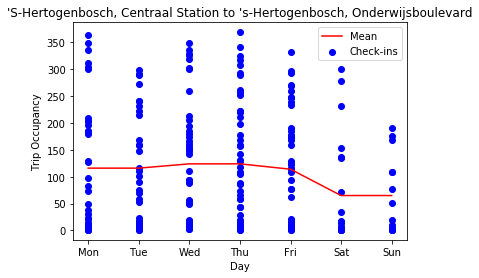

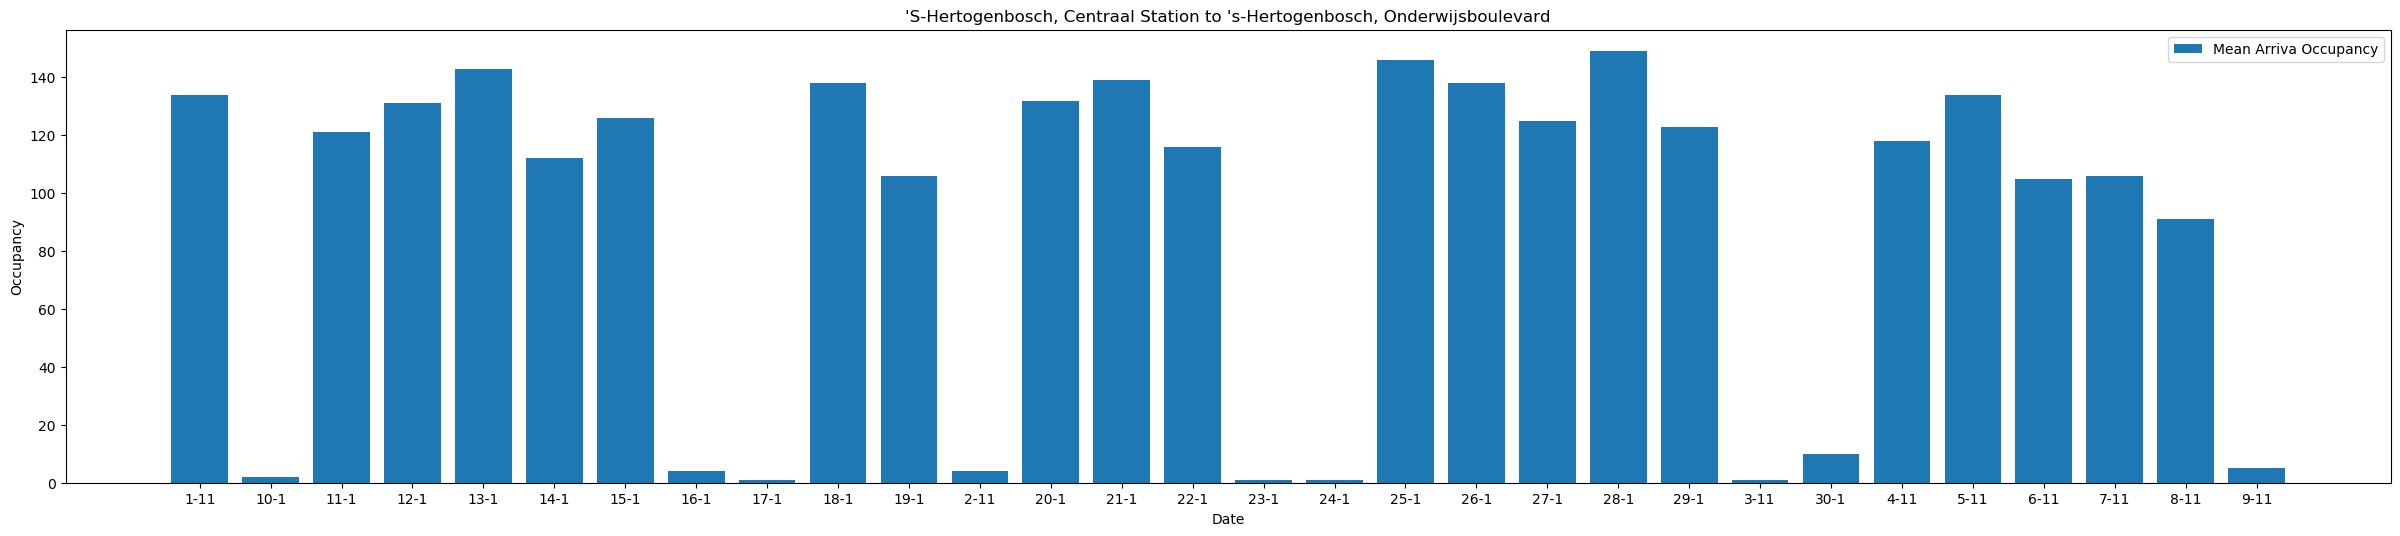

In [91]:
plot_trip_byweekday(stops[1],stops[0]),plot_trip_bydate(stops[1],stops[0])

(None, None)

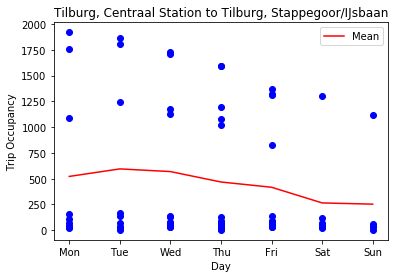

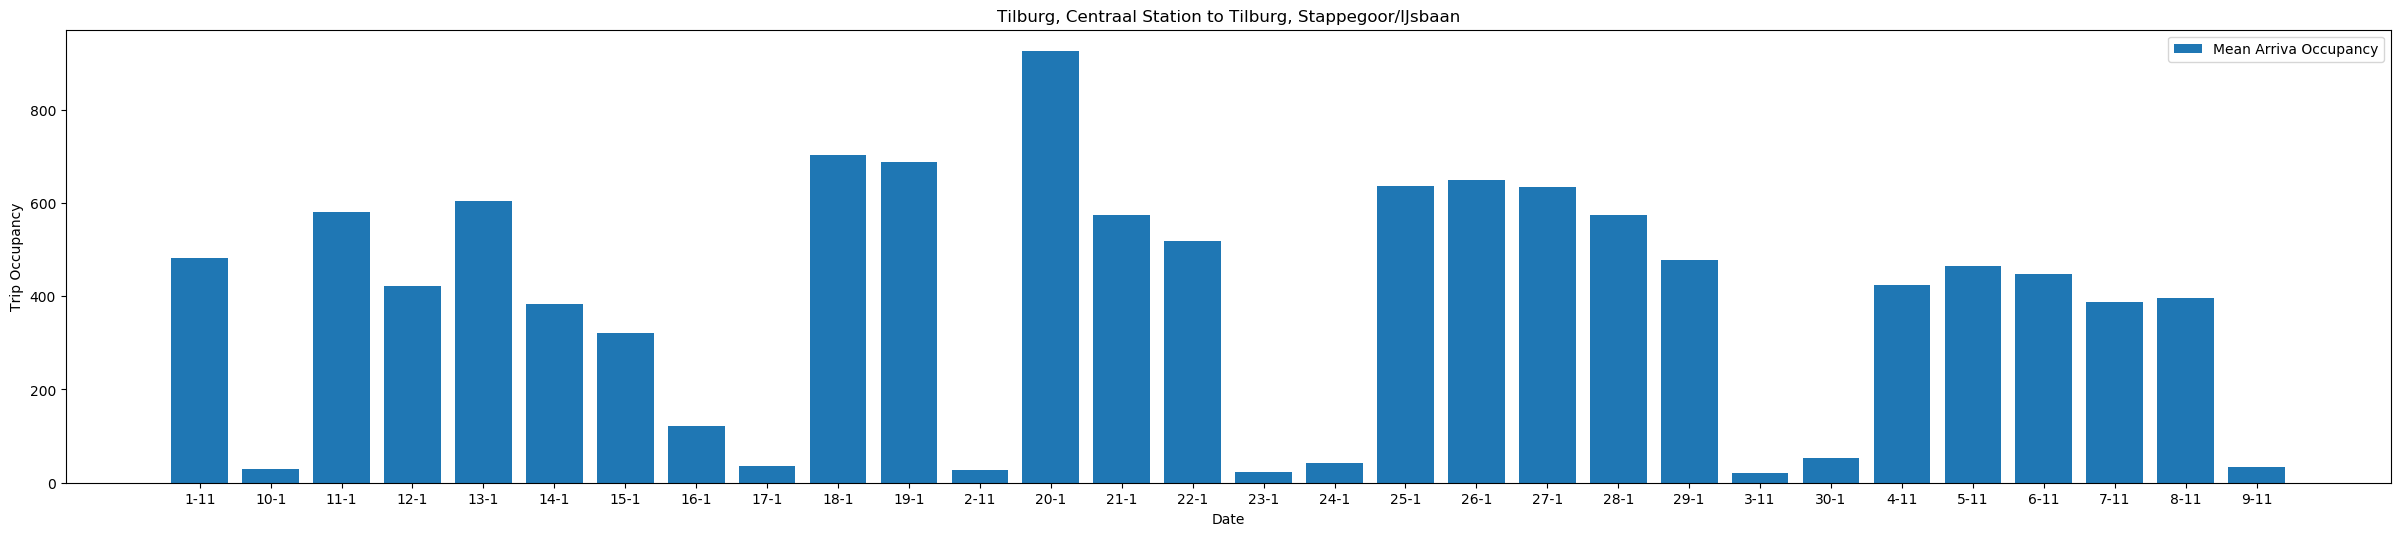

In [76]:
plot_trip_byweekday(stops[2],stops[3]),plot_trip_bydate(stops[2],stops[3])

(None, None)

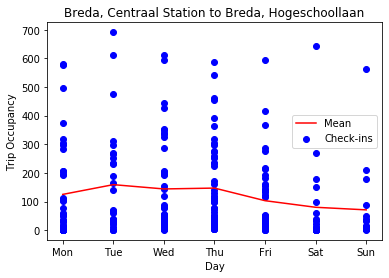

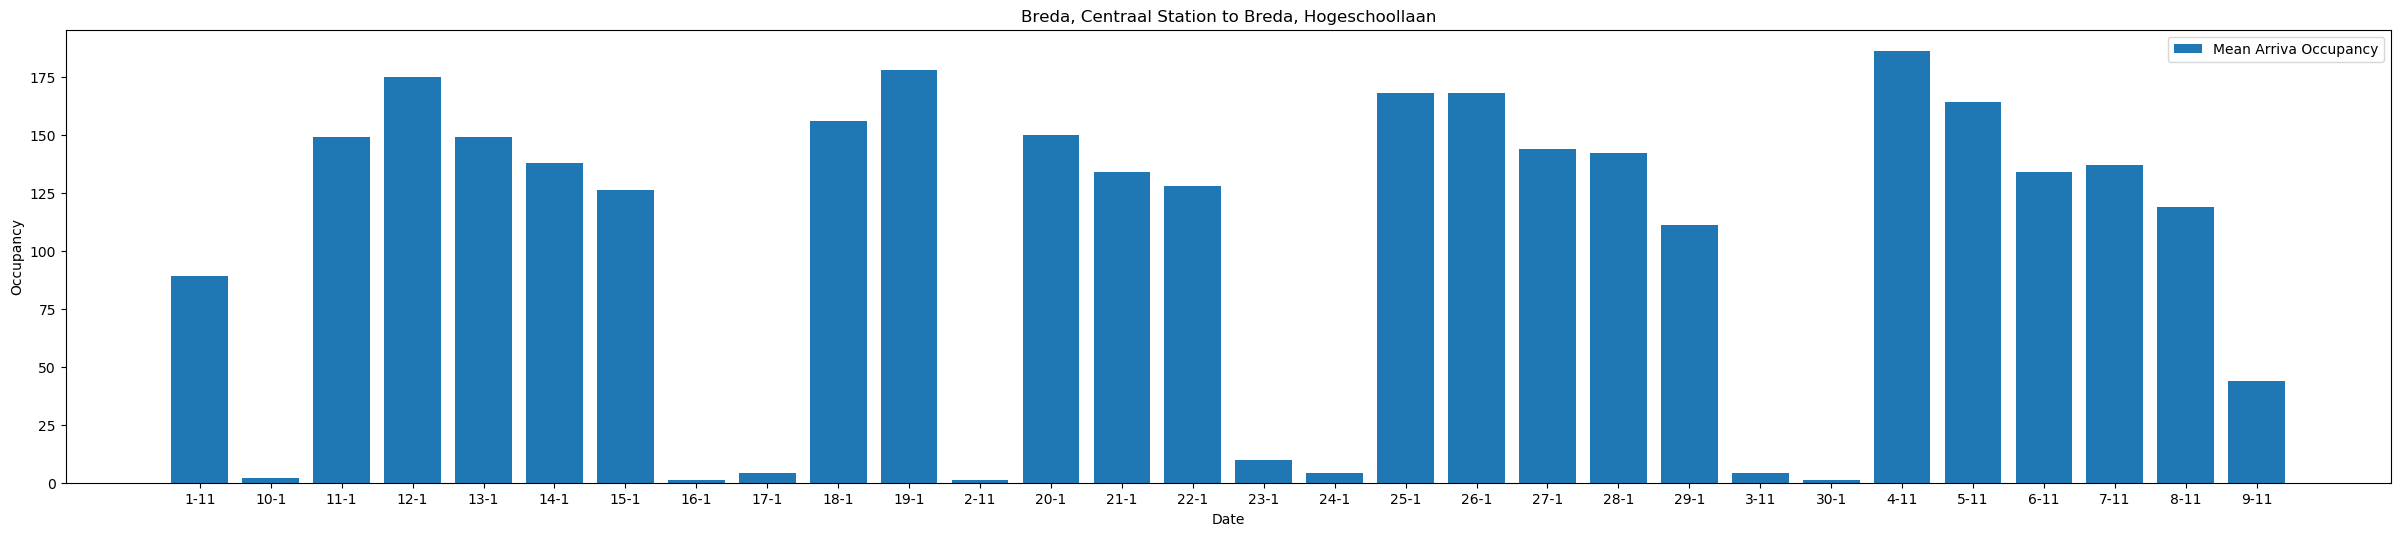

In [92]:
plot_trip_byweekday(stops[4],stops[5]),plot_trip_bydate(stops[4],stops[5])

(None, None)

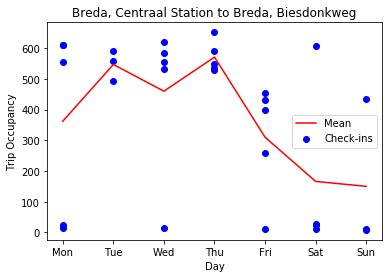

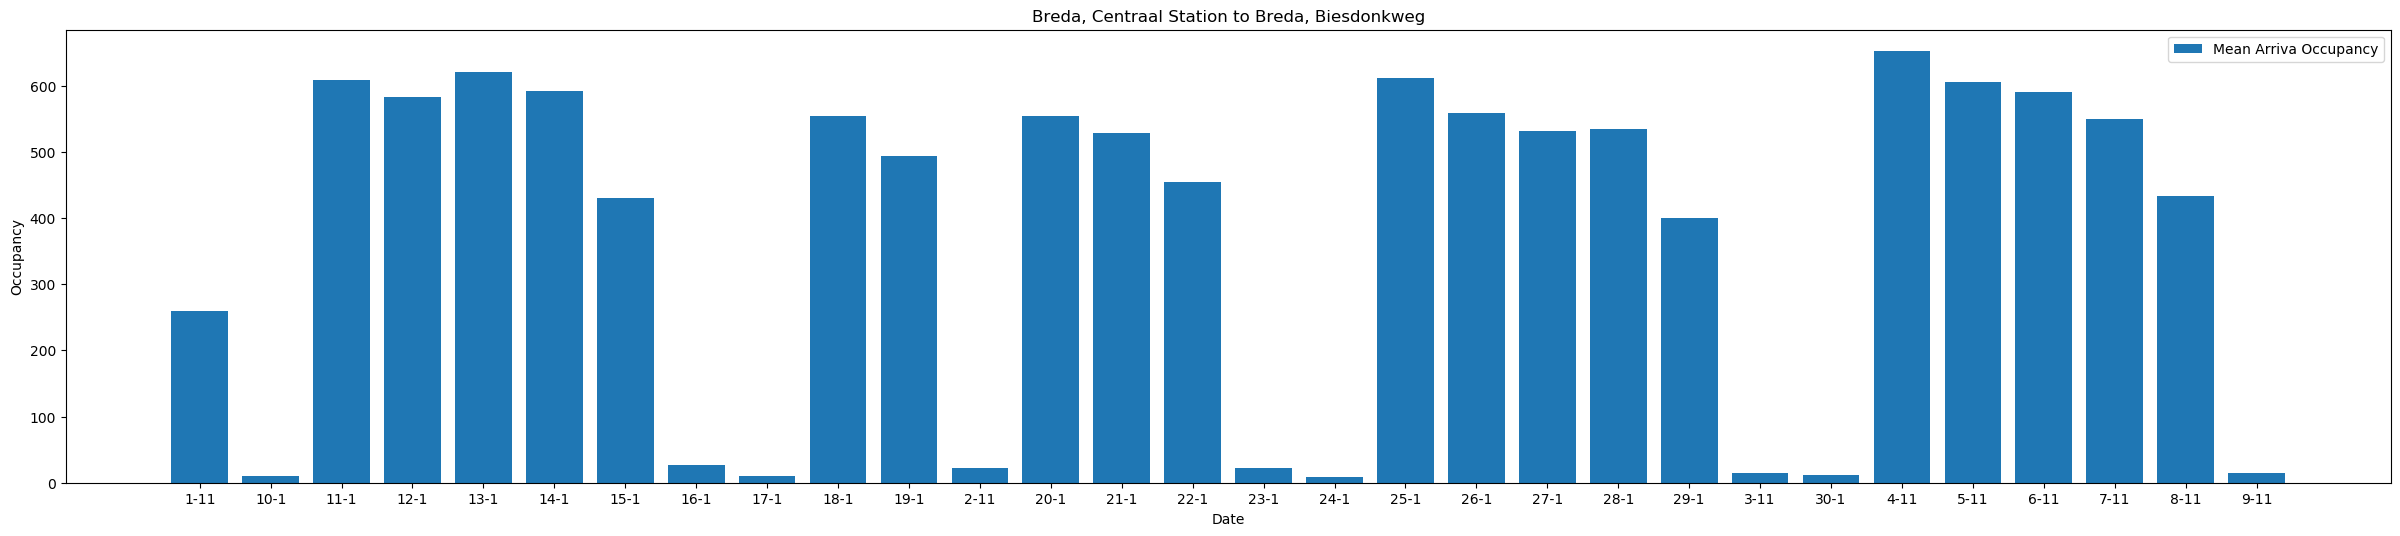

In [95]:
plot_trip_byweekday(stops[4],stops[6]),plot_trip_bydate(stops[4],stops[6])

In [62]:
len(arriva_cleaned['Destination Station'].unique())

1825

In [2]:
import pandas as pd
# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit

# models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor

#pipelines
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer


In [28]:
arriva_cleaned = pd.read_pickle("C:\\Users\\Sumeet Zankar\\Downloads\\DEIA-1\\bus data\\arriva_cleaned")
y = arriva_cleaned[['Totaal']]
X = arriva_cleaned[['Day_num','Source Station','Destination Station']]
X_s, _ , y_s, _ = train_test_split(X,y,train_size=0.05,shuffle=True,random_state=1)
categorical_features = ['Day_num','Source Station','Destination Station']
numerical_features = []

In [684]:
#define regressor pipeline function
def regressor_pipeline(estimator):
    
    # Creating a pipeline with one-hot-encoder for categorical data 
    categoric_transformer = make_pipeline(OneHotEncoder(sparse=False,handle_unknown='ignore'))

    # Creating a pipeline with mean imputer for numerical data 
    #numeric_transformer =  make_pipeline(StandardScaler())  
    
    # Combining both pipelines such that each pipeline works on the columns it was meant for
    preprocessor = make_column_transformer((categoric_transformer,categorical_features)
     )

    # Return the complete pipeline containing preprocessing-piepline and the estimator/classifier
    return Pipeline(steps = [('prep',preprocessor),('est',estimator)])


In [686]:
# define 4 regression models to evaluate
models = {'linear_regressor': regressor_pipeline(LinearRegression(n_jobs=-1)).fit(X_s,y_s) ,
            'neural_net_regressor': regressor_pipeline(MLPRegressor(random_state=1)).fit(X_s,y_s),
            #'svm_regressor': regressor_pipeline(SVR()).fit(X_s,y_s),
            'rf_regressor': regressor_pipeline(RandomForestRegressor(n_estimators=500,random_state=1)).fit(X_s,y_s)}


results = {'linear_regressor':[],
                'neural_net_regressor':[],
                #'svm_regressor':[],
                'rf_regressor':[] 
          }



In [ ]:
for (model_name,model_pipe) in models.items():
    #index=0
    for metric in ['neg_mean_absolute_error','neg_mean_squared_error','r2']:
        
        results[model_name].append(np.mean(cross_validate(model_pipe,X, y, scoring=metric,cv=ShuffleSplit(n_splits=3,random_state=1),    return_train_score=False)['test_score']))  
        #index += 1
#res = pd.DataFrame(index=['neg_mean_absolute_error','neg_mean_squared_error','r2'],columns=results.keys).from_dict(data=results)
res = pd.DataFrame(data=results)
res['metrics'] = pd.Series(['mae','mse','r2'])

print(res)


In [7]:
bus_request_counts = bus_9292[['Startdatum_lag','Starttijd_lag','Haltenaam_van_rit','Haltenaam_naar_rit']].groupby(['Startdatum_lag','Haltenaam_van_rit','Haltenaam_naar_rit']).count()
bus_request_counts.columns = pd.Index(['Request Counts'])
bus_request_counts.reset_index(inplace=True)

In [8]:
bus_request_counts.insert(loc=1,column='Day_num',value=pd.Series(pd.DatetimeIndex(bus_request_counts['Startdatum_lag'])).dt.dayofweek)
bus_request_counts.columns = ['Exploitatiedatum','Day_num','Source Station','Destination Station','Totaal']

In [113]:
bus_request_counts[(bus_request_counts['Source Station'].str.contains('Bre'))&(bus_request_counts['Source Station'].str.contains('Hoges'))]

Exploitatiedatum  Day_num          Source Station Destination Station  \
264          2019-10-31        3  Hogeschoollaan , Breda     station , Breda   
1980         2019-11-01        4  Hogeschoollaan , Breda     station , Breda   
5966         2019-11-02        5  Hogeschoollaan , Breda     station , Breda   
9270         2019-11-03        6  Hogeschoollaan , Breda     station , Breda   
12838        2019-11-04        0  Hogeschoollaan , Breda     station , Breda   
...                 ...      ...                     ...                 ...   
133263       2019-12-02        0  Hogeschoollaan , Breda     station , Breda   
133939       2019-12-03        1  Hogeschoollaan , Breda     station , Breda   
134321       2019-12-04        2  Hogeschoollaan , Breda     station , Breda   
134605       2019-12-05        3  Hogeschoollaan , Breda     station , Breda   
136968       2019-12-16        0  Hogeschoollaan , Breda     station , Breda   

        Totaal  
264         10  
1980       119  
5966         7  
9270         9  
12838      190  
...        ...  
133263       6  
133939       1  
134321       5  
134605       3  
136968       1  

[62 rows x 5 columns]

(None, None)

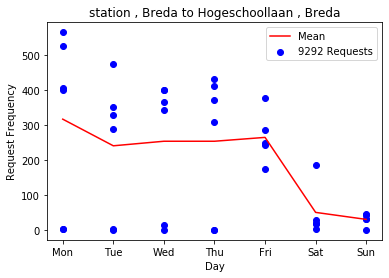

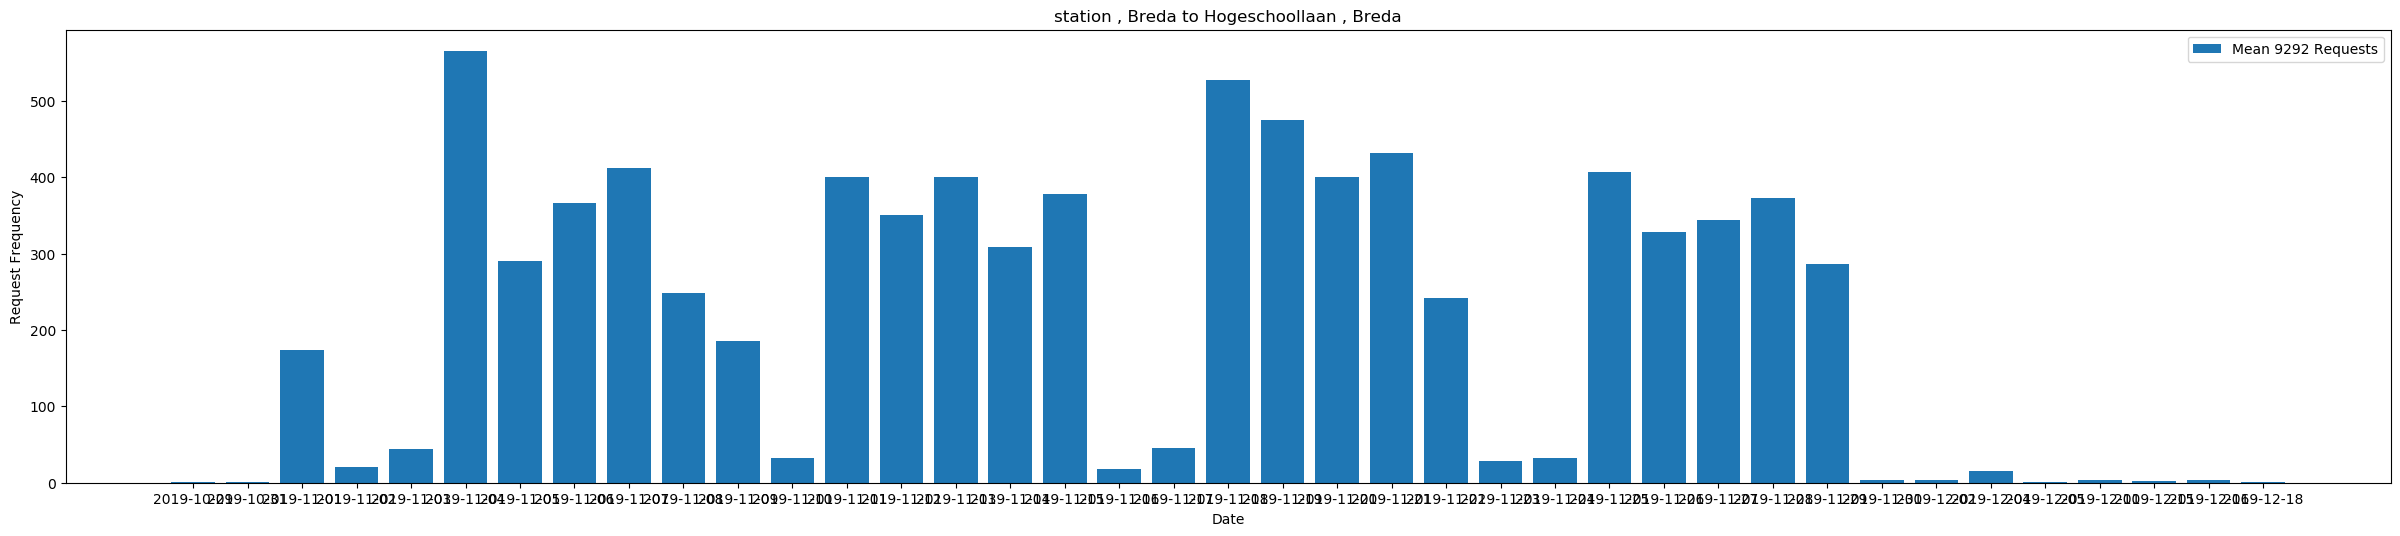

In [114]:
plot_trip_byweekday_9292('station , Breda','Hogeschoollaan , Breda'), plot_trip_bydate_9292('station , Breda','Hogeschoollaan , Breda')

(None, None)

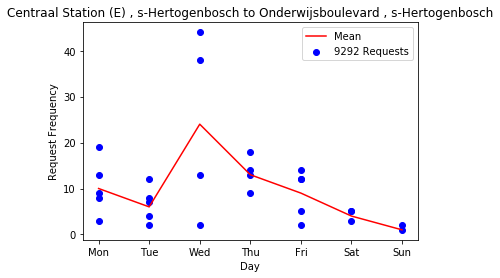

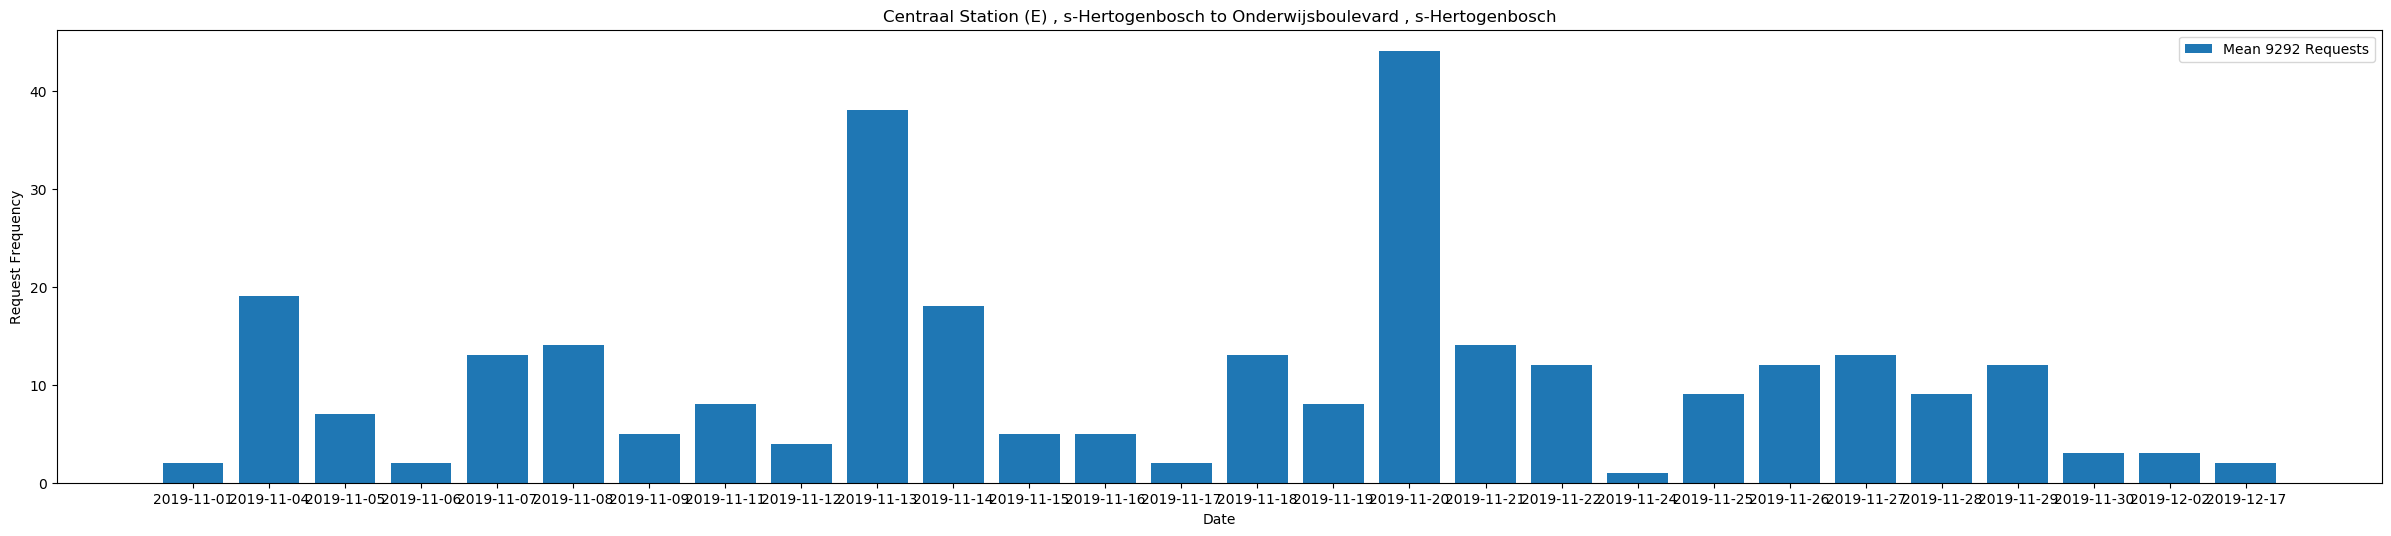

In [98]:
plot_trip_byweekday_9292('Centraal Station (E) , s-Hertogenbosch','Onderwijsboulevard , s-Hertogenbosch'), plot_trip_bydate_9292('Centraal Station (E) , s-Hertogenbosch','Onderwijsboulevard , s-Hertogenbosch')

(None, None)

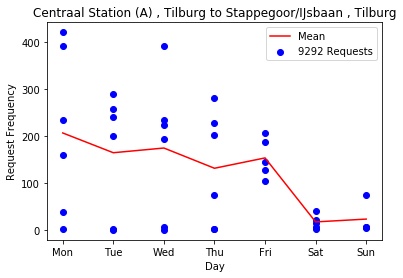

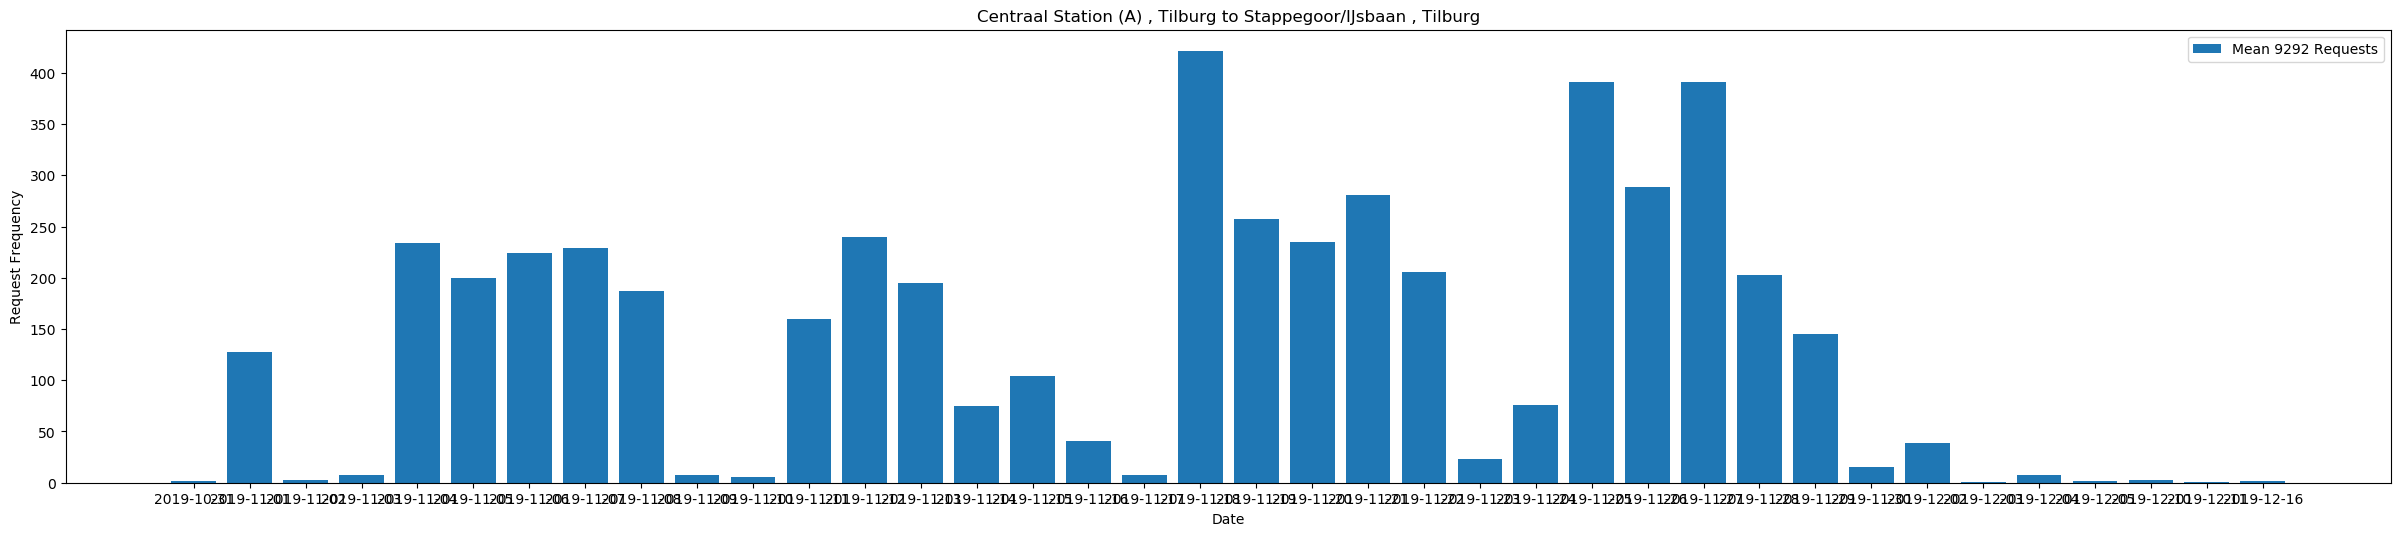

In [87]:
plot_trip_byweekday_9292('Centraal Station (A) , Tilburg','Stappegoor/IJsbaan , Tilburg'), plot_trip_bydate_9292('Centraal Station (A) , Tilburg','Stappegoor/IJsbaan , Tilburg')

In [ ]:
	
trip_data = bus_request_counts[(bus_request_counts['Source Station']==source)&(bus_request_counts['Destination Station']==destination)]

In [85]:
def plot_trip_byweekday_9292(source,destination):

    trip_data = bus_request_counts[(bus_request_counts['Source Station']==source)&(bus_request_counts['Destination Station']==destination)]
    #trip_data.plot(x='Day_num',y='Totaal',kind='scatter',title=source+' to '+destination)    
    agg_trip = bus_request_counts[(bus_request_counts['Source Station']==source)&(bus_request_counts['Destination Station']==destination)].groupby(['Day_num']).mean()
    agg_trip = agg_trip.reset_index()


    plt.scatter([elem for elem in trip_data['Day_num'].astype(int).values],[elem for elem in trip_data['Totaal'].astype(int).values],c='b',label='9292 Requests')
    
    plt.plot([elem for elem in agg_trip['Day_num'].astype(int).values],[elem for elem in agg_trip['Totaal'].astype(int).values],c='r',label='Mean')
    
    plt.xticks(agg_trip['Day_num'],[elem for elem in ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']])
    plt.xlabel('Day')
    plt.ylabel('Request Frequency')
    plt.legend(loc='best')
    plt.title(source+' to '+destination)



def plot_trip_bydate_9292(source,destination):

    trip_data = bus_request_counts[(bus_request_counts['Source Station']==source)&(bus_request_counts['Destination Station']==destination)]
    #trip_data.plot(x='Day_num',y='Totaal',kind='scatter',title=source+' to '+destination
    agg_trip = bus_request_counts[(bus_request_counts['Source Station']==source)&(bus_request_counts['Destination Station']==destination)].groupby(['Exploitatiedatum']).mean()
    agg_trip = agg_trip.reset_index()

    plt.figure(num=None, figsize=(30, 6), dpi=100, facecolor='w', edgecolor='k')
    #plt.scatter([elem for elem in trip_data['Exploitatiedatum'].values],[elem for elem in trip_data['Totaal'].astype(int).values],c='b')
    plt.bar([elem for elem in agg_trip['Exploitatiedatum'].values],[elem for elem in agg_trip['Totaal'].astype(int).values],label='Mean 9292 Requests')

    plt.xticks(agg_trip['Exploitatiedatum'],[elem for elem in agg_trip['Exploitatiedatum']])
    plt.xlabel('Date')
    plt.ylabel('Request Frequency')

    plt.legend(loc='best')
    plt.title(source+' to '+destination)    

In [115]:
arriva_cleaned.shape

(453700, 6)

In [116]:
bus_request_counts.shape

(138463, 5)

In [637]:
df_haltes = pd.DataFrame(   
                            set(bus_request_counts.Haltenaam_van_rit.unique())
                            .union(set(bus_request_counts.Haltenaam_naar_rit.unique()))
                            )

df_haltes.columns = ['9292_halte']
df_haltes

9292_halte
0      Arnold Kaldenbachstraat , Zutphen
1                  Moskeeplein , Utrecht
2                      Heiakker , Deurne
3                        Zweins , Zweins
4                    De Druif , Klundert
...                                  ...
11171             Spieringweg , Cruquius
11172   De Savornin Lohmansingel , Gouda
11173            Vaarselstraat , Someren
11174                  Het Slyk , Vianen
11175    Prins Bernhardbrug , Moordrecht

[11176 rows x 1 columns]

In [663]:
[str(arriva_haltes[ (arriva_haltes['CHB_quayNaam'].str.contains(elem.split()[0]) ) &
                (arriva_haltes['CHB_plaats'].str.contains(elem.split()[-1]) )
              ]['CHB_Haltenaam'].unique())[2:-2] for elem in df_haltes['9292_halte']]



#[e[-1] for e in elem.split() ]

error: missing ), unterminated subpattern at position 11

In [662]:
str(arriva_haltes[ (arriva_haltes['CHB_quayNaam'].str.contains('Centraal Station') ) &
                (arriva_haltes['CHB_plaats'].str.contains('Tilburg') )
              ]['CHB_Haltenaam'].unique())[2:-2]

'Tilburg, Centraal Station'

halte
0      Arnold Kaldenbachstraat , Zutphen
1                  Moskeeplein , Utrecht
2                      Heiakker , Deurne
3                        Zweins , Zweins
4                    De Druif , Klundert
...                                  ...
11171             Spieringweg , Cruquius
11172   De Savornin Lohmansingel , Gouda
11173            Vaarselstraat , Someren
11174                  Het Slyk , Vianen
11175    Prins Bernhardbrug , Moordrecht

[11176 rows x 1 columns]

In [176]:
arriva_haltes['CHB_Haltenaam']=arriva_haltes['CHB_Haltenaam'].str.lower()

In [107]:
arriva_haltes[arriva_haltes['CHB_plaats'].str.contains('airport')]

Empty DataFrame
Columns: [Arriva_FARESTOPSHORTDESCRIPTION, CHB_Haltenaam, afstand, Arriva_CODE, Arriva_FARESTOPSHORTNAME, Arriva_IDFVFARESTOP, Arriva_WGS_COORD_LAT, Arriva_WGS_COORD_LON, CHB_quayNaam, CHB_straat, CHB_plaats]
Index: []

In [190]:
df_haltes[df_haltes['halte'].str.contains('Tilburg')]

halte
198             Alpenlaan , Tilburg
208           Oudenstaart , Tilburg
264    Hoevensekanaaldijk , Tilburg
273    Prof.v. Buchemlaan , Tilburg
315            Kempenbaan , Tilburg
...                             ...
10950              Arriva , Tilburg
11024     Lage Witsiebaan , Tilburg
11065       Lourdesstraat , Tilburg
11086          Westerpark , Tilburg
11113               Linge , Tilburg

[176 rows x 1 columns]

In [ ]:
### MVP: 
# Given the day of the week, and the source and destination stop, product will predict expected bus occupancy for your trip.


### Target Variable : Bus Occupancy

### Input Variables:
### Day (Constructed from Date)
### Hour 
### Source Stop
### Destination Stop
### 


### MVP: 
## To Generate Value from 9292 request_advice data (+ arriva passenger data)


In [18]:
all_unique_source_stops = np.unique(bus_passenger_data['Station Herkomst'])

In [19]:
all_unique_stops = np.unique(bus_passenger_data['Station'])